# KPMG virtual internship

# Bikes & Cycling Accessories Organisation
- Cohort Analysis
- RFM Analysis
- Segmentation Analysis

#### We are provided with 4 datasets:

- Customer Demographic
- Customer Addresses
- New Customer List
- Transactions data in the past 3 months

# Part 1: Importing Libraries


In [368]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

import missingno as msno
from textwrap import wrap
import calendar
import scipy.stats as stats

%matplotlib inline
sns.set_style("whitegrid")
sns.color_palette("colorblind")

# suppress warnings 
import warnings
warnings.simplefilter("ignore")

# Part 2: Data cleaning & EDA

In [369]:
data = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')

In [370]:
# Loading dataset
Transactions = pd.read_excel(data,'Transactions')

In [371]:
Transaction_df = Transactions.copy()

## 1.Transaction_df

In [372]:
# View data
Transaction_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [373]:
Transaction_df.columns = Transaction_df.iloc[0]
Transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [374]:
Transaction_df.drop(index=Transaction_df.index[0], axis=0, inplace=True)

In [375]:
Transaction_df.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000,20000,20000,20000,19640,20000,19803,19803,19803,19803,20000.00,19803.00,19803
unique,20000,101,3494,364,2,2,6,4,3,3,296.00,103.00,100
top,1,0,2183,2017-02-14 00:00:00,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,33879
freq,1,1378,14,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234


In [376]:
Transaction_df.shape

(20000, 13)

In [377]:
Transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


<Axes: xlabel='0'>

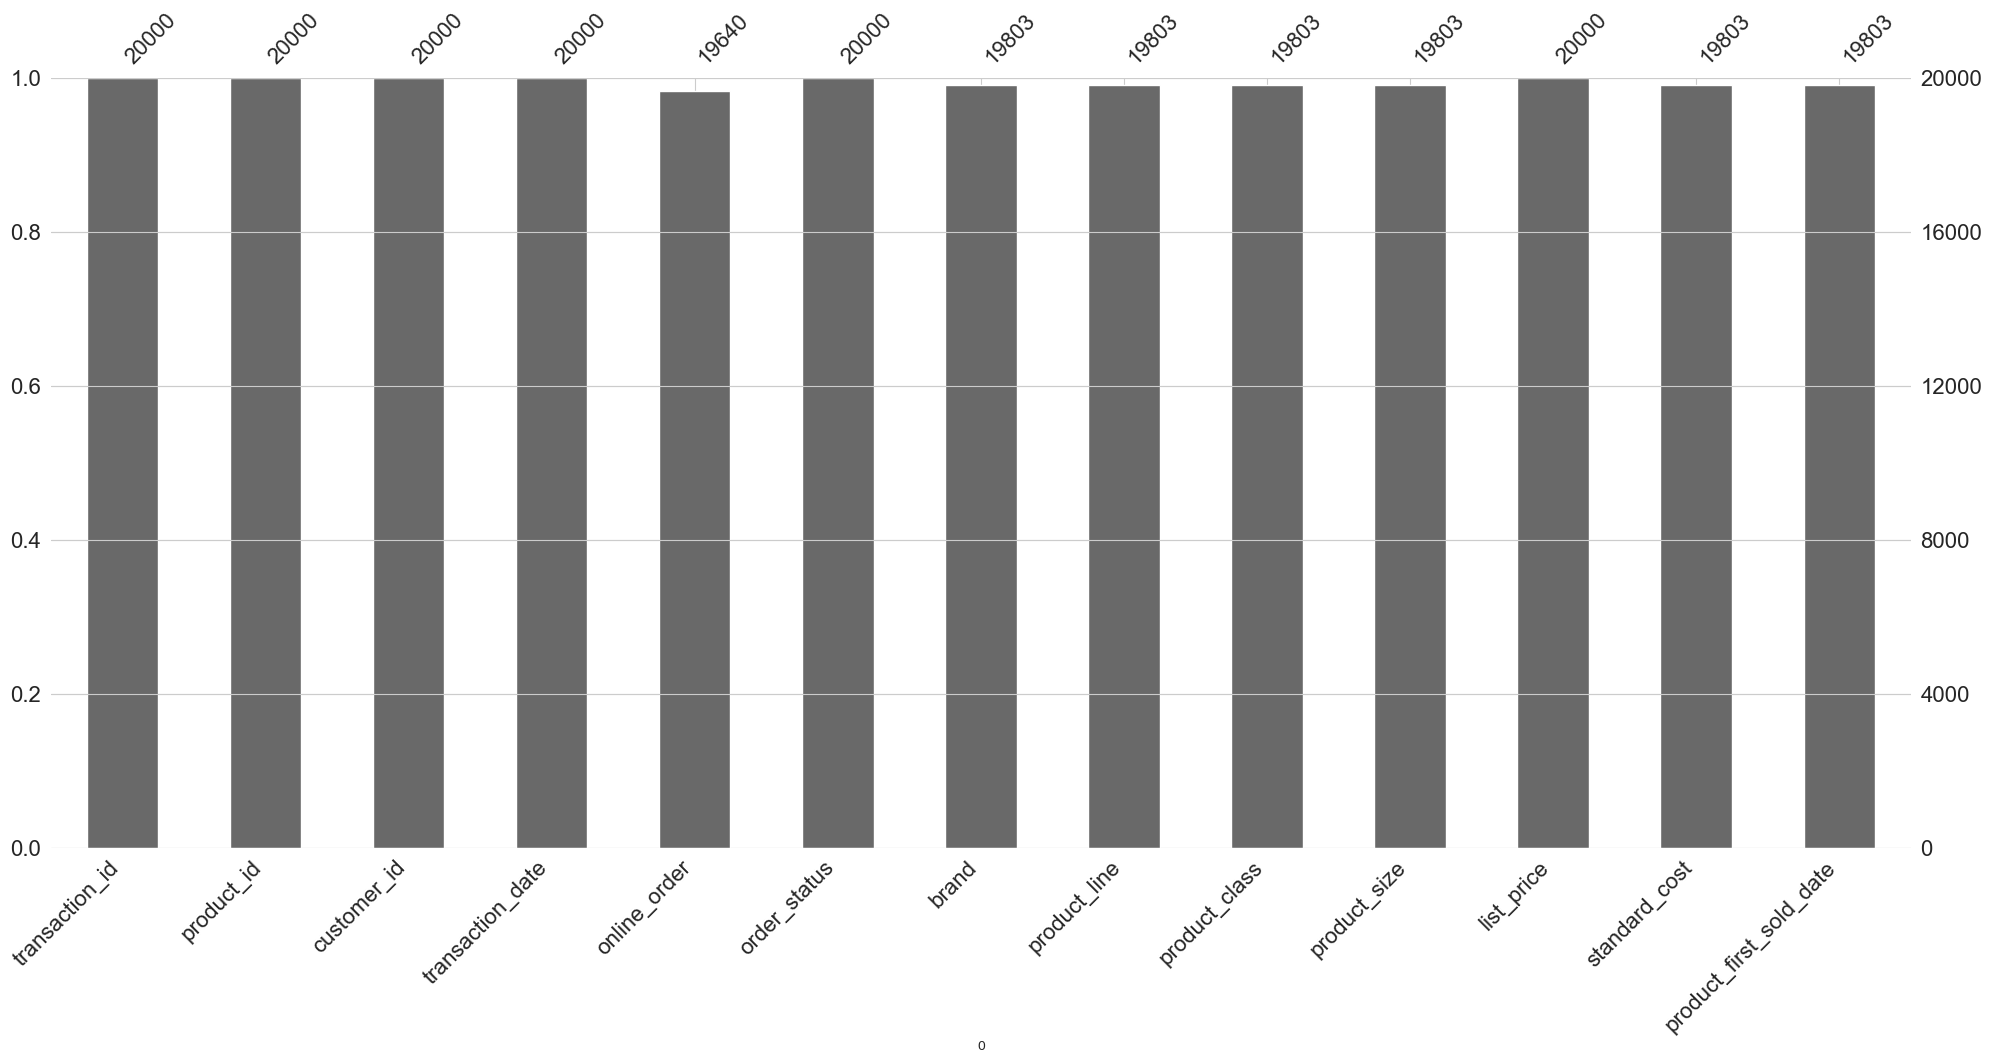

In [378]:
## Checking and working with missing value
msno.bar(Transaction_df)

In our dataset, we aim to have complete data with 20,000 entries in each column. However, we've noticed that certain columns like 'online_order,' 'brand,' 'product_line,' 'product_class,' 'product_size','standard_cost', and 'product_first_sold_date' contain missing values. To address this, we will first identify these missing values using the 'isnull()' function (both 'missingno' and 'isnull()' yield the same results). After identifying the missing values, we will proceed to replace them with 'NaN' and then employ imputation techniques to handle them."

In [379]:
#Checking for null values
Transaction_df.isnull().sum()

0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [380]:
#Checking for duplicate values
Transaction_df.duplicated().sum()

#There are no duplicate values, so the data is unique.

0

In [381]:
# Checking unique value from each columns
for col in Transaction_df.columns:
    print("{} have {} unique values: {}".format(col, Transaction_df[col].nunique(), Transaction_df[col].dtypes))
    if Transaction_df[col].dtypes == 'int64' or Transaction_df[col].dtypes == 'float' or Transaction_df[col].dtypes == 'object':
        print("{} values: {}".format(col,Transaction_df[col].unique()))
        print('')

transaction_id have 20000 unique values: object
transaction_id values: [1 2 3 ... 19998 19999 20000]

product_id have 101 unique values: object
product_id values: [2 3 37 88 78 25 22 15 67 12 5 61 35 16 79 33 54 27 82 89 64 19 72 91 1 99
 0 92 14 44 76 46 55 66 81 86 32 77 96 6 47 94 93 60 28 4 38 56 58 50 80
 87 84 21 31 62 17 73 45 49 95 18 70 26 39 36 98 75 42 20 24 53 65 29 11
 10 7 41 9 69 90 97 100 74 71 34 57 23 51 59 63 40 8 13 30 48 68 83 43 52
 85]

customer_id have 3494 unique values: object
customer_id values: [2950 3120 402 ... 130 2789 3446]

transaction_date have 364 unique values: object
transaction_date values: [datetime.datetime(2017, 2, 25, 0, 0) datetime.datetime(2017, 5, 21, 0, 0)
 datetime.datetime(2017, 10, 16, 0, 0)
 datetime.datetime(2017, 8, 31, 0, 0) datetime.datetime(2017, 10, 1, 0, 0)
 datetime.datetime(2017, 3, 8, 0, 0) datetime.datetime(2017, 4, 21, 0, 0)
 datetime.datetime(2017, 7, 15, 0, 0) datetime.datetime(2017, 8, 10, 0, 0)
 datetime.datetime(2017, 8

In [382]:
print(Transaction_df.info())
for col in Transaction_df.columns:
    # Check if the column is of object type
    if Transaction_df[col].dtypes == 'object':
        # Impute with the most frequent value
        Transaction_df[col] = Transaction_df[col].fillna(Transaction_df[col].value_counts().index[0])
# Count the number of NaNs in the dataset and print the counts to verify
print(Transaction_df.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB
None
0


In [383]:
# Define the reference date
reference_date = pd.to_datetime('1900-01-01')

# Convert the float values to datetime format
Transaction_df['product_first_sold_date'] = reference_date + pd.to_timedelta(Transaction_df['product_first_sold_date'], unit='D')


In [384]:
Transaction_df['product_first_sold_date']

1       2012-12-04
2       2014-03-05
3       1999-07-22
4       1998-12-18
5       2015-08-12
           ...    
19996   2003-07-23
19997   1997-05-12
19998   2010-08-22
19999   2004-08-19
20000   1999-06-25
Name: product_first_sold_date, Length: 20000, dtype: datetime64[ns]

The values in the "product_first_sold_date" column are inaccurate, as they indicate that all events occurred on the same day but at different times.

In [385]:
# Collecting the categorical columns into  list
cat_col=[x for x in Transaction_df.dtypes.index if Transaction_df.dtypes[x]=='object']
cat_col

['order_status', 'brand', 'product_line', 'product_class', 'product_size']

In [386]:
#checking for duplicated values in the categorical columns nd the accuracy of the values
for col in cat_col:
    print(col)
    print(Transaction_df[col].unique())
    print('\n*******\n')

order_status
['Approved' 'Cancelled']

*******

brand
['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B']

*******

product_line
['Standard' 'Road' 'Mountain' 'Touring']

*******

product_class
['medium' 'low' 'high']

*******

product_size
['medium' 'large' 'small']

*******



There is '0.5004582484725051' in 'online_order' column

In [387]:
# Impute '0.5004582484725051' with the most common value (mode) of the 'online_order' column.
mode_value = Transaction_df['online_order'].mode().iloc[0]
Transaction_df['online_order'].replace(0.5004582484725051, mode_value, inplace=True)


Profit column created from List price and Standard cost column in Transaction dataset.

In [388]:
Transaction_df['Profit'] = round(Transaction_df['list_price'] - Transaction_df['standard_cost'], 2)


create new variables as follows:
- Transaction year
- Transaction month name
- Transaction day
- Transaction day name

In [389]:
# Changing transactions date column into transaction year, month, day, day_name columns
Transaction_df['Transaction_year'] = Transaction_df['transaction_date'].dt.year.astype(str)
Transaction_df['Transaction_month'] = Transaction_df['transaction_date'].dt.month.astype(str)
Transaction_df['Transaction_day'] = Transaction_df['transaction_date'].dt.day.astype(str)
Transaction_df['day_of_the_week'] = Transaction_df['transaction_date'].dt.day_name()

In [390]:
# Checking datatype
print(Transaction_df['Transaction_year'].dtype)
print(Transaction_df['Transaction_month'].dtype)
print(Transaction_df['Transaction_day'].dtype)
print(Transaction_df['day_of_the_week'].dtype)


object
object
object
object


In [391]:
to_string_list = ['transaction_id', 'product_id', 'customer_id']
for col in to_string_list:
    Transaction_df[col] = Transaction_df[col].astype(str)

In [392]:
# numerical data
nums_t = Transaction_df.loc[:, (Transaction_df.dtypes == 'int64') | (Transaction_df.dtypes == float)].columns.tolist()
print(nums_t)
print('Counts :', len(nums_t))

['list_price', 'standard_cost', 'Profit']
Counts : 3


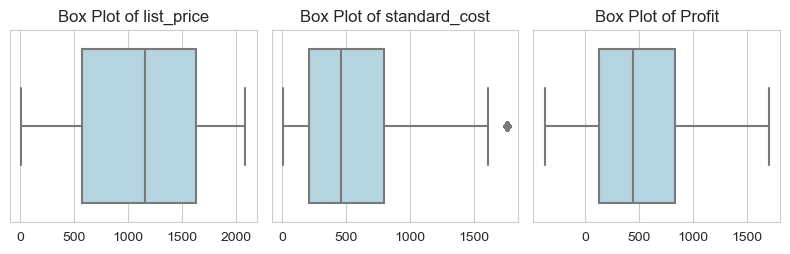

In [393]:
# distribution numerical data
# Create a box plot for each numerical column
plt.figure(figsize=(8, 7))
for i, col in enumerate(nums_t):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=Transaction_df[col], color='lightblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel('')
    plt.ylabel('')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Observations
- The median for standard cost is lower within the interquartile range, indicating a skew towards lower standard costs.
- List price and profit distributions are more symmetric, with medians centrally placed in their boxes, showing an even distribution of values.
- Aside from one outlier in the standard cost, all metrics predominantly lack extreme variations or outliers.

In [394]:
# categorical data
cats_t = Transaction_df.loc[:, (Transaction_df.dtypes == object)].columns.tolist() 
print(cats_t)
print('Counts :', len(cats_t))

['transaction_id', 'product_id', 'customer_id', 'order_status', 'brand', 'product_line', 'product_class', 'product_size', 'Transaction_year', 'Transaction_month', 'Transaction_day', 'day_of_the_week']
Counts : 12


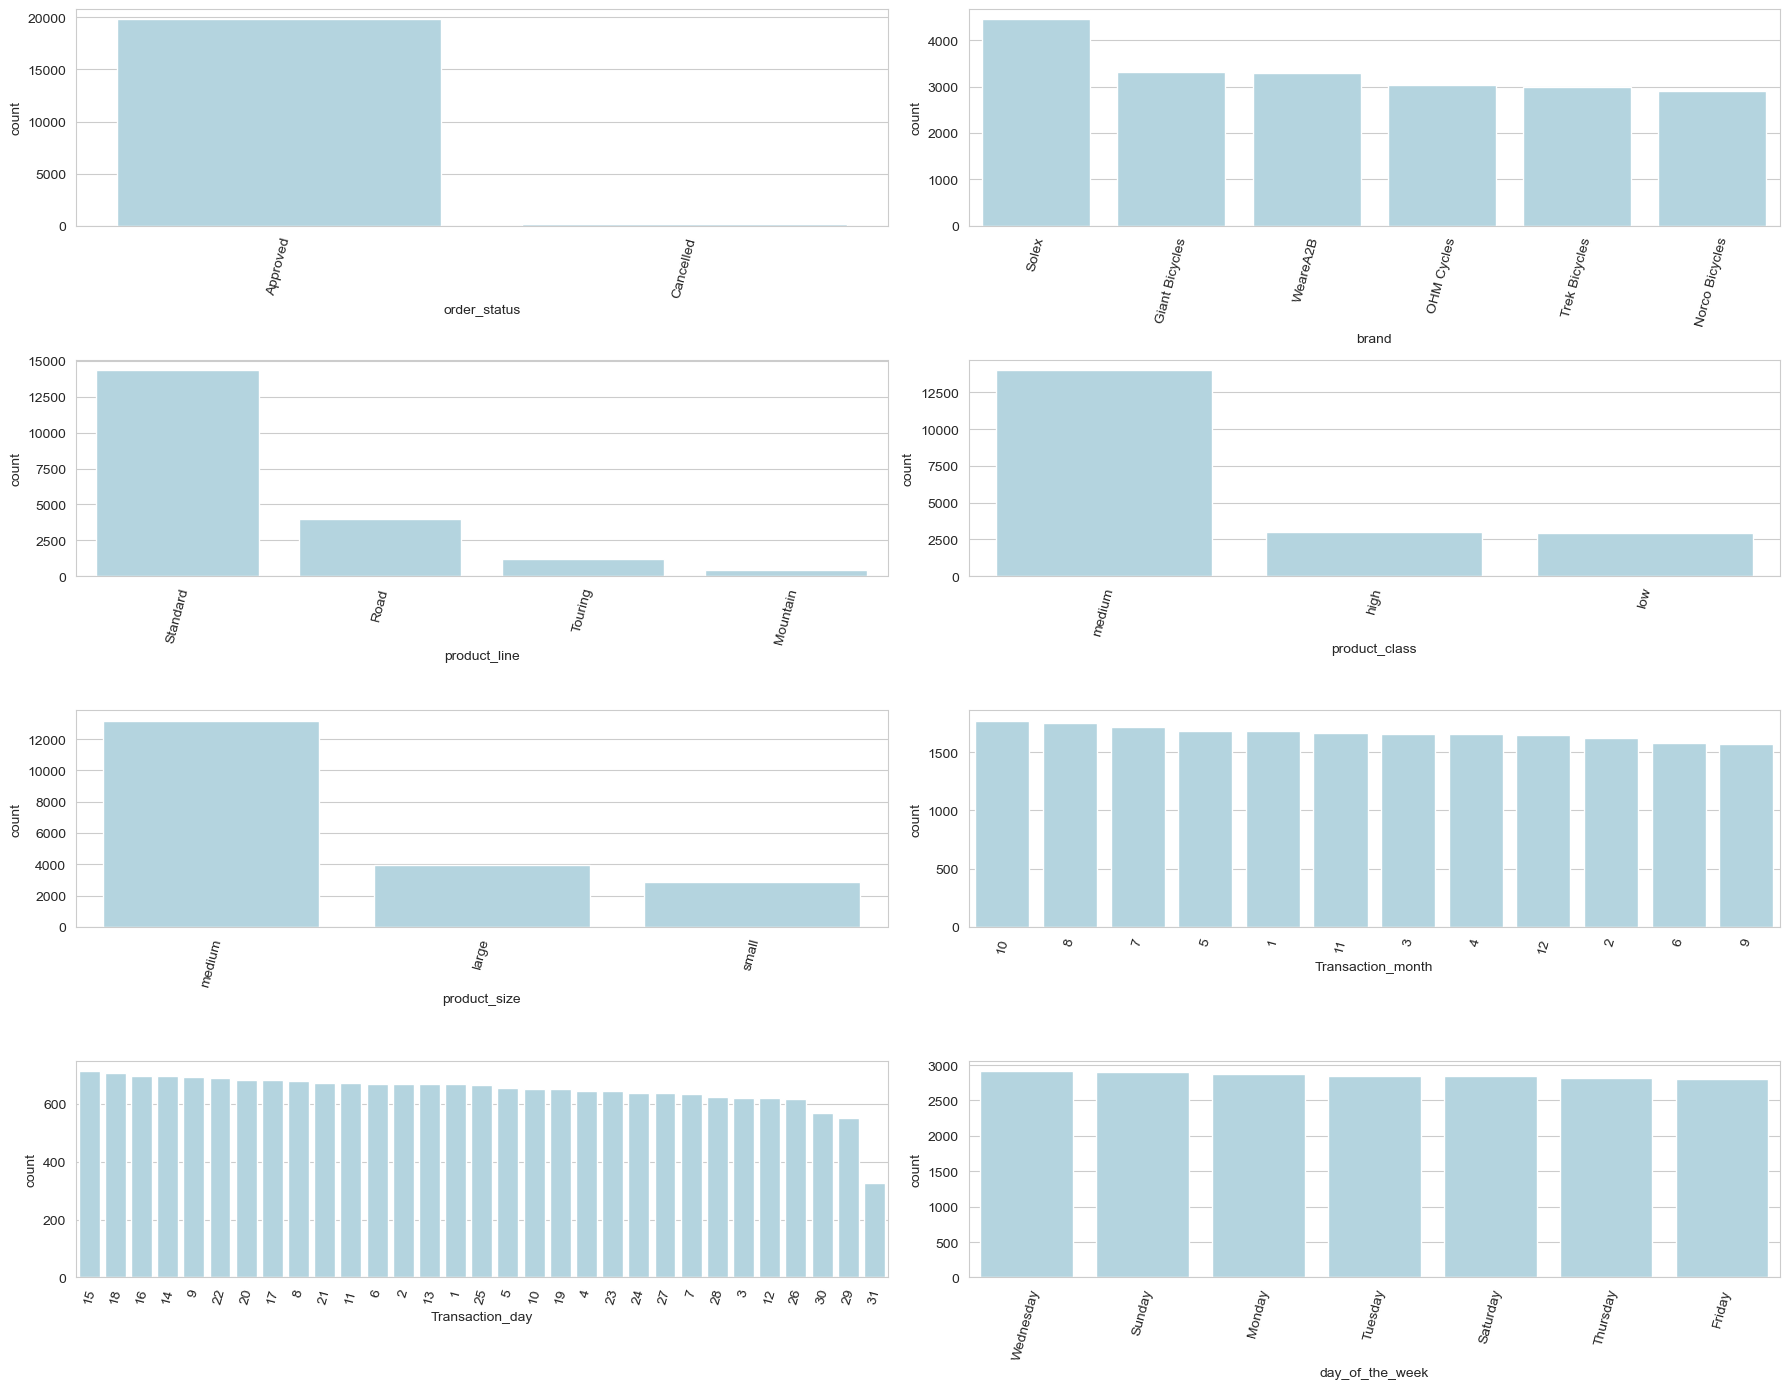

In [395]:
# List of categorical columns to plot
selected_cats = ['order_status', 'brand', 'product_line', 'product_class', 'product_size',  'Transaction_month', 'Transaction_day', 'day_of_the_week']

# Calculate the number of rows and columns needed based on the number of selected categorical columns
num_cols = 2  # Number of columns
num_rows = (len(selected_cats) + num_cols - 1) // num_cols  # Calculate number of rows

plt.figure(figsize=(18, 14))
for i in range(0, len(selected_cats)):
    plt.subplot(num_rows, num_cols, i+1)
    sns.countplot(x=Transaction_df[selected_cats[i]], color='lightBlue', orient='v', order=Transaction_df[selected_cats[i]].value_counts().index)
    plt.xticks(rotation=75)  # Rotate x-axis tick labels
    plt.tight_layout()

# Optionally, you can add sorting order for Transaction_month using month_order
for ax in plt.gcf().axes:
    if ax.get_title() == 'Transaction_month':
        ax.set_xticklabels(month_order)  # Apply month order to Transaction_month

plt.show()


# Observations:
- The majority of orders are approved with few cancellations.
- The 'Standard' product line significantly outsells 'Road', 'Touring', and 'Mountain' lines.
- 'Solex' is the most frequent brand, with other brands like 'WeareA2B', 'OHM Cycles', etc., showing comparable counts.
- 'Medium' is the predominant product class, with 'low' being the least common.
- 'Medium' sized products are the most common, with 'small' sizes being the least common.
- Sales transactions peak in July, August, and October, suggesting higher business activity during these months.

In [396]:
print(Transaction_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  object        
 1   product_id               20000 non-null  object        
 2   customer_id              20000 non-null  object        
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  bool          
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

## 2.NewCustomerList

In [397]:
# Loading Dataset
NewCustomer = pd.read_excel(data, 'NewCustomerList', skiprows=1)
# Make a copy of the DataFrame
NewCustomer_df = NewCustomer.copy()


In [398]:
#View Data
NewCustomer_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.70,0.8750,1.09375,0.929688,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.48,0.4800,0.60000,0.510000,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.96,0.9600,0.96000,0.960000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.59,0.7375,0.73750,0.737500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.46,0.4600,0.57500,0.575000,4,4,1.703125


In [399]:
NewCustomer_df.drop(columns=['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], inplace=True)
NewCustomer_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [400]:
NewCustomer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

 'postcode', 'rank'  should be categorical data;


In [401]:
NewCustomer_df['postcode'] = NewCustomer_df['postcode'].astype(str)
NewCustomer_df['Rank'] = NewCustomer_df['Rank'].astype(str)

In [402]:
NewCustomer_df.duplicated().sum()

0

In [403]:
#Checking for null values
NewCustomer_df.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

all of the categorical columns will either be filling the null values with the mode or mean value.

1. DOB: fill nulls with mean.
2. job_title: fill nulls with mode.
3. job_industry_category: fill nulls with mode.

In [404]:

# Calculate age from DOB and add it as a new column
NewCustomer_df['age'] = 2023 - NewCustomer_df['DOB'].dt.year

# Fill null values in 'job_title' column with the mode
job_title_mode = NewCustomer_df['job_title'].mode()[0]
NewCustomer_df['job_title'].fillna(job_title_mode, inplace=True)

# Fill null values in 'job_industry_category' column with the mode
job_industry_category_mode = NewCustomer_df['job_industry_category'].mode()[0]
NewCustomer_df['job_industry_category'].fillna(job_industry_category_mode, inplace=True)

In [405]:
# Checking unique value from each columns
for col in NewCustomer_df.columns:
    print("{} have {} unique values: {}".format(col, NewCustomer_df[col].nunique(), NewCustomer_df[col].dtypes))
    if NewCustomer_df[col].dtypes == 'int64' or NewCustomer_df[col].dtypes == 'float' or NewCustomer_df[col].dtypes == 'object':
        print("{} values: {}".format(col,NewCustomer_df[col].unique()))
        print('')

first_name have 940 unique values: object
first_name values: ['Chickie' 'Morly' 'Ardelis' 'Lucine' 'Melinda' 'Druci' 'Rutledge'
 'Nancie' 'Duff' 'Barthel' 'Rockwell' 'Wheeler' 'Olag' 'Melba' 'Mandie'
 'Dukie' 'Marcelia' 'Winnifred' 'Odilia' 'Karly' 'Teddie' 'Gaston' 'Otis'
 'Tabbatha' 'Brena' 'Rourke' 'Dyane' 'Claudine' 'Blinnie' 'Rhona'
 'Sharron' 'Brien' 'Sybilla' 'Mikel' 'Maisie' 'Arleen' 'Farlie' 'Mitchell'
 'Garik' 'Antonin' 'Vinny' 'Colene' 'Neile' 'Corinna' 'Brooke' 'Gipsy'
 'Sheena' 'Jobina' 'Gale' 'Thaxter' 'Heinrick' 'Taylor' 'Griswold'
 'Odessa' 'Lavena' 'Martelle' 'Briant' 'Marylou' 'Whittaker' 'Normy'
 'Lorrie' 'Jedediah' 'Kaine' 'Loise' 'Cristen' 'Dorothy' 'Rosmunda'
 'Rozamond' 'Gunner' 'Vivienne' 'Sherilyn' 'Bessie' 'Kevina' 'Yancy'
 'Mabelle' 'Hasheem' 'Tobias' 'Glennis' 'Chanda' 'Katheryn' 'Sumner'
 'Valerie' 'Esther' 'Gardie' 'Sean' 'Pietra' 'Marysa' 'Kahaleel' 'Ossie'
 'Sid' 'Ludovico' 'Patricia' 'Andromache' 'Levy' 'Nobe' 'Jehu' 'Symon'
 'Karlik' 'Bengt' 'Evangelin

In [406]:
# Drop deceased_indicator since this column only has one value
NewCustomer_df = NewCustomer_df.drop(columns=['deceased_indicator'])


In [407]:
# Rename value 
NewCustomer_df['gender'] = NewCustomer_df['gender'].replace('U','Unidentified')

In [408]:
# Calculate age based on the current year (2024) and the 'DOB' column
current_year = pd.Timestamp('now').year
NewCustomer_df['age'] = 2023 - NewCustomer_df['DOB'].dt.year

# Optionally, fill NaN values in the 'age' column with a default value or 0
NewCustomer_df['age'].fillna(0, inplace=True)

# Display the DataFrame
print(NewCustomer_df)

    first_name  last_name  gender  past_3_years_bike_related_purchases  \
0      Chickie    Brister    Male                                   86   
1        Morly     Genery    Male                                   69   
2      Ardelis  Forrester  Female                                   10   
3       Lucine      Stutt  Female                                   64   
4      Melinda     Hadlee  Female                                   34   
..         ...        ...     ...                                  ...   
995  Ferdinand  Romanetti    Male                                   60   
996       Burk    Wortley    Male                                   22   
997   Melloney      Temby  Female                                   17   
998     Dickie    Cubbini    Male                                   30   
999      Sylas    Duffill    Male                                   56   

           DOB                     job_title job_industry_category  \
0   1957-07-12               General Mana

In [409]:
# Deal with missing data for 'last_name'
NewCustomer_df['last_name'].fillna('Unknown', inplace=True)

In [410]:
NewCustomer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            1000 non-null   object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            1000 non-null   object        
 6   job_industry_category                1000 non-null   object        
 7   wealth_segment                       1000 non-null   object        
 8   owns_car                             1000 non-null   object        
 9   tenure                               1000 non-null   int64         
 10  address      

In [411]:
# numerical data
nums_t = NewCustomer_df.loc[:, (NewCustomer_df.dtypes == 'int64') | (NewCustomer_df.dtypes == float)].columns.tolist()
print(nums_t)
print('Counts :', len(nums_t))

['past_3_years_bike_related_purchases', 'tenure', 'property_valuation', 'Value', 'age']
Counts : 5


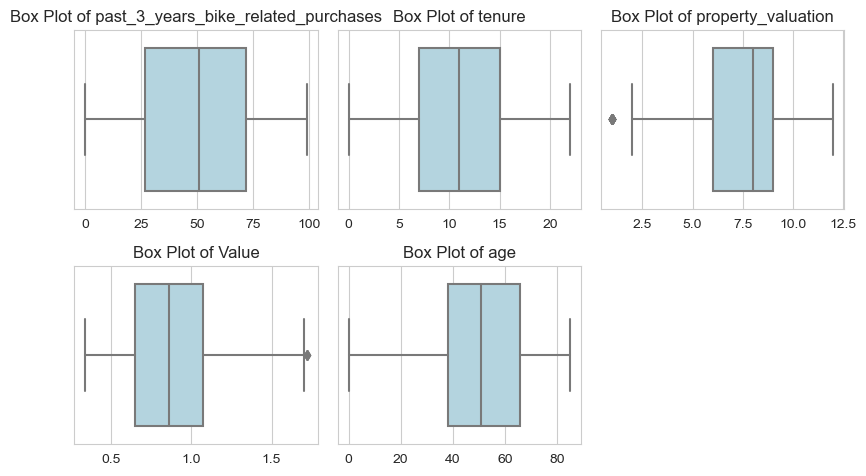

In [412]:
# distribution numerical data
# Create a box plot for each numerical column
plt.figure(figsize=(8, 7))
for i, col in enumerate(nums_t):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=NewCustomer_df[col], color='lightblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel('')
    plt.ylabel('')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Observations:
- Past 3 Years Bike-Related Purchases: Evenly distributed with a central median, indicating a balanced spread of purchases with no outliers.
- Tenure: Symmetrical distribution with a median centered in the range, no outliers, suggesting consistent durations of tenure.
- Property Valuation: Slightly right-skewed with one lower-end outlier, indicating most property values are clustered towards the lower end of the scale.
- Value: Low dispersion with a central median and an upper-end outlier, suggesting values are tightly grouped with an occasional high extreme.
- Age:  A right skew with the median age leaning towards the older end of the spectrum and a consistent range of ages without outliers.


In [413]:
# categorical data
cats_t = NewCustomer_df.loc[:, (NewCustomer_df.dtypes == object)].columns.tolist() 
print(cats_t)
print('Counts :', len(cats_t))

['first_name', 'last_name', 'gender', 'job_title', 'job_industry_category', 'wealth_segment', 'owns_car', 'address', 'postcode', 'state', 'country', 'Rank']
Counts : 12


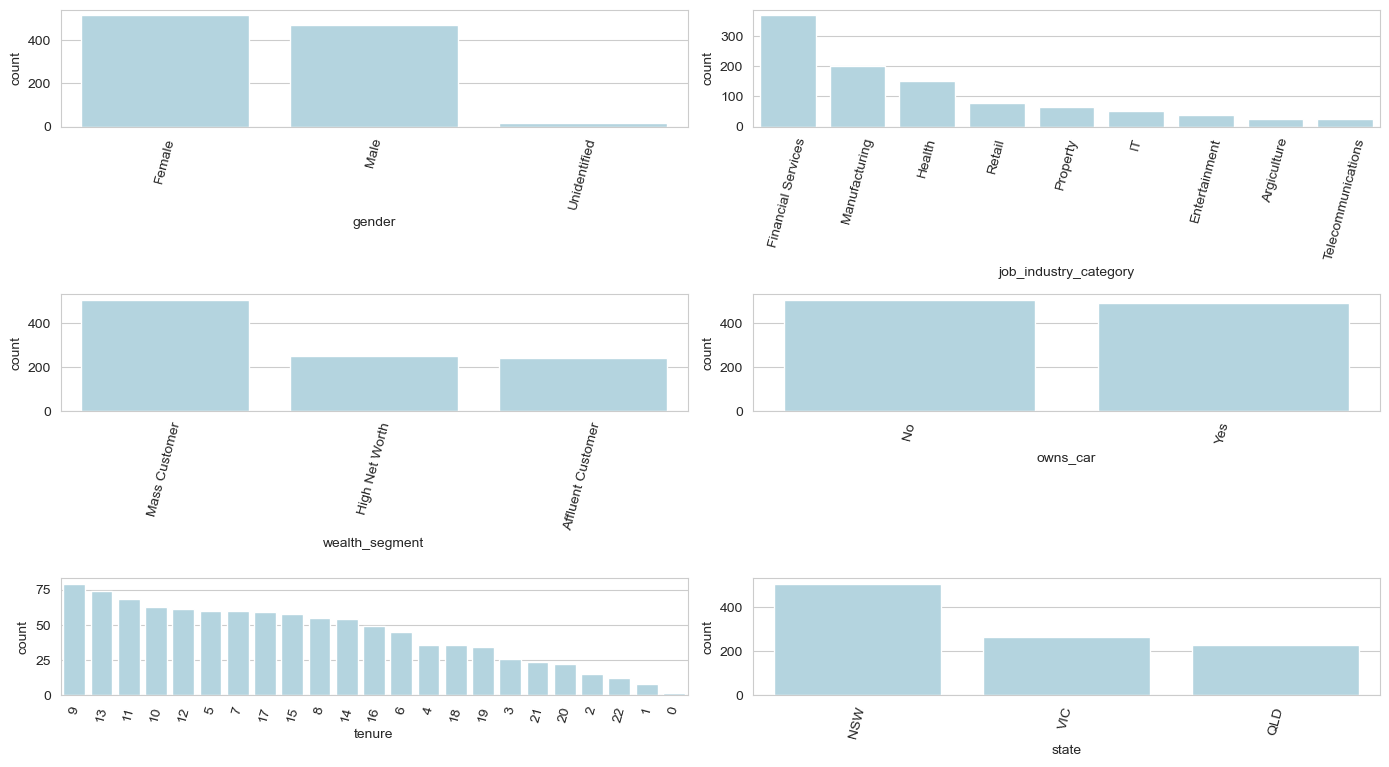

In [414]:
# List of categorical columns to plot
selected_cats = ['gender', 'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'state']

# Create subplots for selected categorical columns
plt.figure(figsize=(14, 10))
for i, cat in enumerate(selected_cats):
    plt.subplot(4, 2, i + 1)
    
    # Calculate the descending order of categories
    order = NewCustomer_df[cat].value_counts().index
    
    sns.countplot(x=NewCustomer_df[cat], color='lightblue', orient='v', order=order)
    plt.xticks(rotation=75)  # Rotate x-axis tick labels by 75 degrees
    plt.tight_layout()

plt.show()

# Observations:
- Gender: More females than males are represented, with a small number of unspecified gender.
- Job Industry Category: Financial Services is the leading industry for job distribution, followed by Manufacturing and Health.
- Wealth Segment: The majority of individuals are classified as 'Mass Customer', with fewer 'High Net Worth' and 'Affluent Customer' segments.
- State: NSW is the most represented state, with VIC and QLD having lower representations.

## 3.CustomerDemographic

In [415]:
CustomerDemographic= pd.read_excel(data, 'CustomerDemographic')
CustomerDemographic_df = CustomerDemographic.copy()
CustomerDemographic_df.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,U,59,1843-12-21,124,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,144,Jory Barrabeale,U,71,NaT,124,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaT,124,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaT,124,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaT,124,Senior Sales Associate,IT,Mass Customer,N,No,NaN


In [416]:
CustomerDemographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   name                                 4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   age                                  4000 non-null   int64         
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [417]:
#Checking for null values
CustomerDemographic_df.isnull().sum()

customer_id                              0
name                                     0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
age                                      0
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [418]:
CustomerDemographic_df['customer_id'] = CustomerDemographic_df['customer_id'].astype(str)

all of the categorical columns will either be filling the null values with the mode or mean value.

1. DOB: fill nulls with ‘2023 - age'.
2. job_title: fill nulls with mode.
3. job_industry_category: fill nulls with mode.
4. tenure: fill nulls with mean

In [419]:
# Convert 'DOB' column to datetime
CustomerDemographic_df['DOB'] = pd.to_datetime(CustomerDemographic_df['DOB'], errors='coerce')

# Replace null values in 'DOB' column with the median
median_dob = CustomerDemographic_df['DOB'].dropna().median()

# Replace null values in 'DOB' column with the median
CustomerDemographic_df['DOB'].fillna(median_dob, inplace=True)

# Check the result
print(CustomerDemographic_df['DOB'].dtype)



datetime64[ns]


In [420]:
# Find the minimum and maximum DOB
min_dob = CustomerDemographic_df['DOB'].min()
max_dob = CustomerDemographic_df['DOB'].max()

print("Minimum DOB:", min_dob)
print("Maximum DOB:", max_dob)

Minimum DOB: 1843-12-21 00:00:00
Maximum DOB: 2002-03-11 00:00:00


The minimum DOB appears to be unreasonable. Let's change it to 1943.

In [421]:
# Correct any incorrect birth years（ 1843-> 1943）
CustomerDemographic_df['DOB'] = CustomerDemographic_df['DOB'].mask(CustomerDemographic_df['DOB'].dt.year == 1843, 
                                                                  CustomerDemographic_df['DOB'] + pd.DateOffset(years=100))
CustomerDemographic_df['DOB'].head()

0   1943-12-21
1   1977-07-22
2   1977-07-22
3   1977-07-22
4   1977-07-22
Name: DOB, dtype: datetime64[ns]

In [422]:
# Calculate age
CustomerDemographic_df['age'] = 2023 - CustomerDemographic_df['DOB'].dt.year

# Check the result
print(CustomerDemographic_df['age'].head())

0    80
1    46
2    46
3    46
4    46
Name: age, dtype: int64


In [423]:
# Fill null values in 'job_title' column with the mode
jobtitle_mode = CustomerDemographic_df['job_title'].mode()[0]
CustomerDemographic_df['job_title'].fillna(jobtitle_mode, inplace=True)

# Fill null values in 'job_industry_category' column with the mode
jobindustry_category_mode = CustomerDemographic_df['job_industry_category'].mode()[0]
CustomerDemographic_df['job_industry_category'].fillna(jobindustry_category_mode, inplace=True)

# Fill null values in 'tenure' column with the mode
CustomerDemographic_df['tenure'].fillna(CustomerDemographic_df['tenure'].mean(), inplace=True)


In [424]:
NewCustomer_df.duplicated().sum()

0

In [425]:
# Checking unique value from each columns
for col in CustomerDemographic_df.columns:
    print("{} have {} unique values: {}".format(col, CustomerDemographic_df[col].nunique(), CustomerDemographic_df[col].dtypes))
    if CustomerDemographic_df[col].dtypes == 'int64' or CustomerDemographic_df[col].dtypes == 'float' or CustomerDemographic_df[col].dtypes == 'object':
        print("{} values: {}".format(col,CustomerDemographic_df[col].unique()))
        print('')

customer_id have 4000 unique values: object
customer_id values: ['34' '144' '168' ... '3435' '3949' '3997']

name have 3998 unique values: object
name values: ['Jephthah Bachmann' 'Jory Barrabeale' 'Reggie Broggetti' ...
 'Stevena Allcock' 'Costa Sleightholm' 'Blanch Nisuis']

gender have 3 unique values: object
gender values: ['U' 'Male' 'Female']

past_3_years_bike_related_purchases have 100 unique values: int64
past_3_years_bike_related_purchases values: [59 71  8 53 42 37 81 58 67 30  9 84 21 48 22 28 39 14 73 24 26 49 57  4
 90 80 32 10 18 13 72 83 82 52 95 47 68 31 16 76 35 41 64 36  1 70  0 17
 20 40 44  3 29 34 78 65 19 60 56 93 38 27 61 99 97 79  2  7 51 89 23 77
  5 74 69 98 55 33  6 75 45 54 12 15 50 96 62 92 66 11 88 25 43 86 63 91
 94 87 85 46]

DOB have 3448 unique values: datetime64[ns]
age have 55 unique values: int64
age values: [80 46 92 88 83 79 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53
 52 51 50 49 48 47 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29

In [426]:
# Convert 'tenure' column to numeric (if it's not already)
CustomerDemographic_df['tenure'] = pd.to_numeric(CustomerDemographic_df['tenure'], errors='coerce')

# Round the 'tenure' column to 2 decimal places
CustomerDemographic_df['tenure'] = CustomerDemographic_df['tenure'].round(2)

In [427]:
# Rename value to solve data incosistency
CustomerDemographic_df['gender'] = CustomerDemographic_df['gender'].replace('U','Unidentified')

In [428]:
# deceased_indicator has N and Y change them into No and Yes to maintain consistency of expression across attributes.
CustomerDemographic_df.deceased_indicator.replace(to_replace='Y', value="Yes", inplace=True)
CustomerDemographic_df.deceased_indicator.replace(to_replace='N', value="No", inplace=True)

In [429]:
CustomerDemographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   object        
 1   name                                 4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  4000 non-null   datetime64[ns]
 5   age                                  4000 non-null   int64         
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [430]:
# numerical data
nums_t = CustomerDemographic_df.loc[:, (CustomerDemographic_df.dtypes == 'int64') | (CustomerDemographic_df.dtypes == float)].columns.tolist()
print(nums_t)
print('Counts :', len(nums_t))

['past_3_years_bike_related_purchases', 'age', 'tenure']
Counts : 3


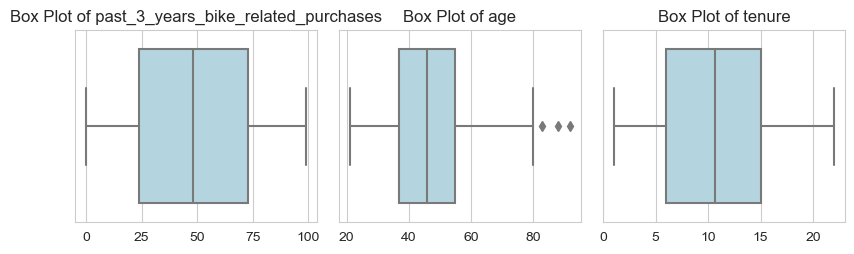

In [431]:
# distribution numerical data
# Create a box plot for each numerical column
plt.figure(figsize=(8, 7))
for i, col in enumerate(nums_t):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=CustomerDemographic_df[col], color='lightblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel('')
    plt.ylabel('')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Observations:
- Bike-Related Purchases: Distribution of past 3 years' bike-related purchases is centered around a median of 50 with a symmetrical spread and no outliers.
- Age: Age distribution shows a median near 50, with a rightward skew indicating a greater spread of older ages and several older age outliers.
- Tenure: Tenure is symmetrically distributed with a median around 12 and no extreme values or outliers.

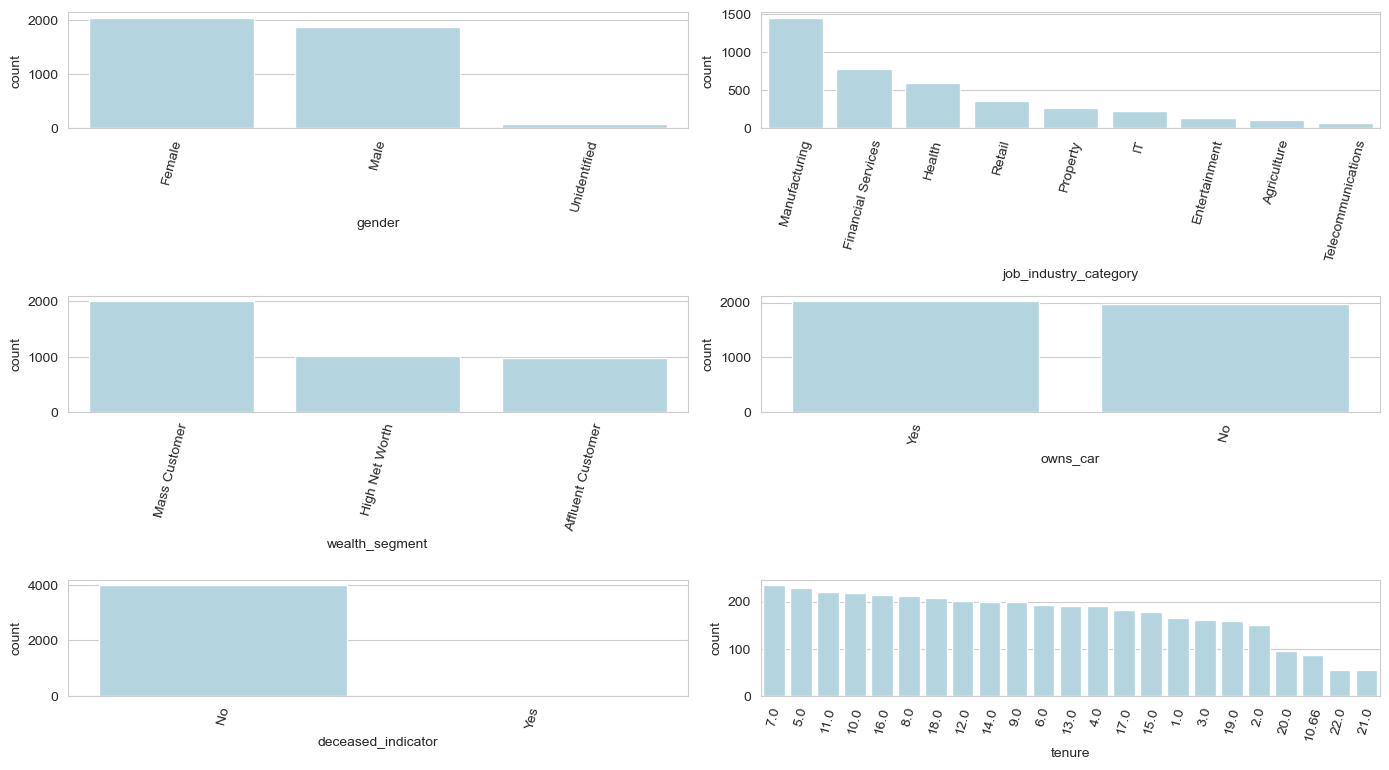

In [65]:
# List of categorical columns to plot
selected_cats = ['gender', 'job_industry_category', 'wealth_segment','owns_car', 'deceased_indicator', 'tenure']

# Create subplots for selected categorical columns
plt.figure(figsize=(14, 10))
for i, cat in enumerate(selected_cats):
    plt.subplot(4, 2, i + 1)
    
    # Count the unique values and sort by count in descending order
    value_counts = CustomerDemographic_df[cat].value_counts().sort_values(ascending=False)
    
    sns.countplot(x=CustomerDemographic_df[cat], color='lightblue', orient='v', order=value_counts.index)
    plt.xticks(rotation=75)  # Rotate x-axis tick labels by 75 degrees
    plt.tight_layout()

plt.show()

# Observations:
- Gender: More females than males, with a minority unspecified.
- Job Industry: Highest representation in Manufacturing, followed by Financial Services and Health.
- Wealth Segment: 'Mass Customer' is the predominant segment over 'High Net Worth' and 'Affluent Customer'.
- Car Ownership: A larger portion of the population does not own a car.
- Deceased Indicator: The overwhelming majority of individuals are alive, with a very small number indicated as deceased.
- Tenure: Most individuals have short tenures, with numbers dwindling for longer tenures.

## 4.CustomerAddress

In [66]:
# Loading Dataset
CustomerAddress = pd.read_excel(data, 'CustomerAddress', skiprows=1)
# Make a copy of the DataFrame
CustomerAddress_df = CustomerAddress.copy()

In [67]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [68]:
CustomerAddress.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [69]:
CustomerAddress.duplicated().sum()

0

In [70]:
CustomerAddress_df['customer_id'] = CustomerAddress_df['customer_id'].astype(str)
CustomerAddress_df['postcode'] = CustomerAddress_df['postcode'].astype(str)

In [71]:
# Checking unique value from each columns
for col in CustomerAddress_df.columns:
    print("{} have {} unique values: {}".format(col, CustomerAddress_df[col].nunique(), CustomerAddress_df[col].dtypes))
    if CustomerAddress_df[col].dtypes == 'int64' or CustomerAddress_df[col].dtypes == 'float' or CustomerAddress_df[col].dtypes == 'object':
        print("{} values: {}".format(col,CustomerAddress_df[col].unique()))
        print('')

customer_id have 3999 unique values: object
customer_id values: ['1' '2' '4' ... '4001' '4002' '4003']

address have 3996 unique values: object
address values: ['060 Morning Avenue' '6 Meadow Vale Court' '0 Holy Cross Court' ...
 '87 Crescent Oaks Alley' '8194 Lien Street' '320 Acker Drive']

postcode have 873 unique values: object
postcode values: ['2016' '2153' '4211' '2448' '3216' '2210' '2650' '2023' '3044' '4557'
 '3799' '2760' '2428' '3331' '3058' '2135' '2233' '2444' '4413' '4740'
 '3218' '4868' '4116' '2519' '2756' '2170' '4005' '4127' '2535' '4726'
 '4805' '2212' '2207' '3350' '3931' '4018' '4670' '2480' '3212' '2322'
 '3198' '2047' '4503' '2145' '4350' '2142' '2029' '2127' '4280' '2166'
 '2046' '2026' '2765' '2749' '2745' '3752' '2217' '2230' '3046' '3183'
 '2070' '2213' '4208' '2774' '4133' '4213' '4170' '2073' '3561' '2330'
 '3977' '2204' '2086' '2226' '2075' '2038' '2069' '2100' '3133' '3070'
 '2777' '2125' '2766' '2209' '2160' '2065' '2150' '2168' '4171' '2155'
 '2517' '2

In [72]:
# Keep consistency
CustomerAddress_df['state'].replace({'New South Wales': 'NSW', 'Victoria': 'VIC'}, inplace=True)


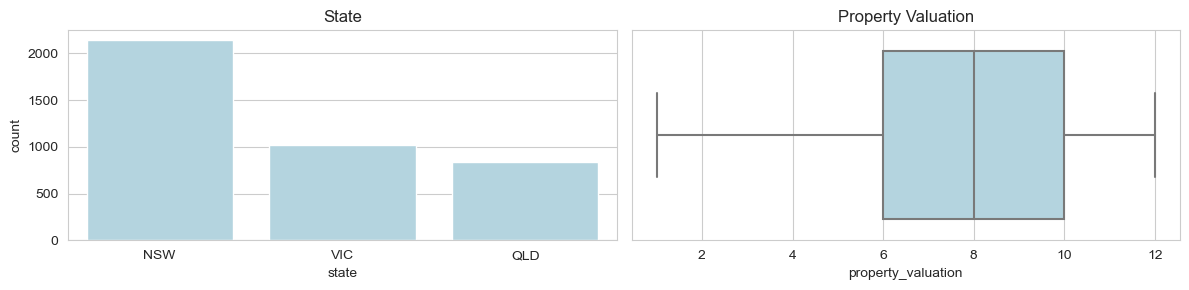

In [73]:
plt.figure(figsize=(12,3))

# Plot countplot for 'state'
plt.subplot(1, 2, 1)
sns.countplot(x='state', data=CustomerAddress_df, color='lightblue', order=CustomerAddress_df['state'].value_counts().index)
plt.title('State')

# Plot boxplot for 'property_valuation'
plt.subplot(1, 2, 2)
sns.boxplot(x='property_valuation', data=CustomerAddress_df, color='lightblue')
plt.title('Property Valuation')

plt.tight_layout()
plt.show()


# Observations:
- State: New South Wales (NSW) has the highest count, significantly more than Victoria (VIC) and Queensland (QLD), indicating a larger population or customer base in NSW.
- Property Valuation: The box plot shows a median property valuation around 8, with the distribution being slightly left-skewed, indicating a larger frequency of lower-valued properties and no outliers.


In [432]:
# Create an ExcelWriter object, specifying the file name
writer = pd.ExcelWriter('cleaned_data.xlsx', engine='xlsxwriter')

# Write each DataFrame to a different sheet in the Excel file
Transaction_df.to_excel(writer, sheet_name='Transaction_df', index=False)
CustomerDemographic_df.to_excel(writer, sheet_name='CustomerDemographic_df', index=False)
CustomerAddress_df.to_excel(writer, sheet_name='CustomerAddress_df', index=False)
NewCustomer_df.to_excel(writer, sheet_name='NewCustomer_df', index=False)


# Save and close the ExcelWriter object
writer.save()


# Part 3: Merge Datasets 

## Merge CustomerDemographic_df with  CustomerAddress_df

In [433]:
# Perform an outer join using customer_id as the key
Customer_merged = CustomerDemographic_df.merge(CustomerAddress_df, on='customer_id', how='outer', indicator=True)
Customer_merged.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,_merge
0,34,Jephthah Bachmann,Unidentified,59.0,1943-12-21,80.0,Legal Assistant,IT,Affluent Customer,No,No,20.00,833 Luster Way,4005,QLD,Australia,8.0,both
1,144,Jory Barrabeale,Unidentified,71.0,1977-07-22,46.0,Environmental Tech,IT,Mass Customer,No,No,10.66,22 Oxford Junction,2315,NSW,Australia,3.0,both
2,168,Reggie Broggetti,Unidentified,8.0,1977-07-22,46.0,General Manager,IT,Affluent Customer,No,Yes,10.66,16 Golf View Center,3020,VIC,Australia,6.0,both
3,267,Edgar Buckler,Unidentified,53.0,1977-07-22,46.0,Business Systems Development Analyst,IT,High Net Worth,No,No,10.66,48 Arizona Drive,2768,NSW,Australia,10.0,both
4,290,Giorgio Kevane,Unidentified,42.0,1977-07-22,46.0,Senior Sales Associate,IT,Mass Customer,No,No,10.66,6923 Tennessee Circle,2766,NSW,Australia,9.0,both


In [434]:
Customer_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4003 entries, 0 to 4002
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4003 non-null   object        
 1   name                                 4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   float64       
 4   DOB                                  4000 non-null   datetime64[ns]
 5   age                                  4000 non-null   float64       
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [435]:
Customer_merged[Customer_merged._merge!='both']

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,_merge
94,3,Arlin Dearle,Male,61.0,1954-01-20,69.0,Recruiting Manager,Property,Mass Customer,No,Yes,15.0,NaN,NaN,NaN,NaN,NaN,left_only
675,22,Deeanne Durtnell,Female,79.0,1962-12-10,61.0,Business Systems Development Analyst,IT,Mass Customer,No,No,11.0,NaN,NaN,NaN,NaN,NaN,left_only
3122,10,Fiorenze Birdall,Female,49.0,1988-10-11,35.0,Senior Quality Engineer,Financial Services,Mass Customer,No,Yes,20.0,NaN,NaN,NaN,NaN,NaN,left_only
3500,23,Olav Polak,Male,43.0,1995-02-10,28.0,Business Systems Development Analyst,Manufacturing,High Net Worth,No,Yes,1.0,NaN,NaN,NaN,NaN,NaN,left_only
4000,4001,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87 Crescent Oaks Alley,2756,NSW,Australia,10.0,right_only
4001,4002,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8194 Lien Street,4032,QLD,Australia,7.0,right_only
4002,4003,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320 Acker Drive,2251,NSW,Australia,7.0,right_only


In [436]:
#dropiing records with _merge column != 'both' and dropping _merge column.
Customer_merged.dropna(inplace=True)
Customer_merged.drop(axis=1, columns='_merge', inplace=True)

In [437]:
#Checking for null values
Customer_merged.isnull().sum()

customer_id                            0
name                                   0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
age                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
dtype: int64

Customer Data is now clean and ready for analysis

## Merge Transactions data with Customer data (using left join)

In [438]:
#merge Transcations data and Customer Data with merge using left join both on customer_id
Combined_df = pd.merge(Transaction_df, Customer_merged, how='left', on='customer_id', indicator=True)
Combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       20000 non-null  object        
 1   product_id                           20000 non-null  object        
 2   customer_id                          20000 non-null  object        
 3   transaction_date                     20000 non-null  datetime64[ns]
 4   online_order                         20000 non-null  bool          
 5   order_status                         20000 non-null  object        
 6   brand                                20000 non-null  object        
 7   product_line                         20000 non-null  object        
 8   product_class                        20000 non-null  object        
 9   product_size                         20000 non-null  object        
 10  list_price

In [439]:
Combined_df[Combined_df._merge!='both']

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,_merge
117,118,20,22,2017-03-21,False,Approved,Trek Bicycles,Standard,medium,small,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3479,3480,32,22,2017-09-18,False,Approved,Giant Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3503,3504,38,22,2017-07-16,True,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4564,4565,5,10,2017-08-26,False,Approved,Trek Bicycles,Mountain,low,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4600,4601,65,22,2017-05-29,True,Approved,WeareA2B,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5597,5598,85,23,2017-12-20,False,Approved,WeareA2B,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5955,5956,21,10,2017-06-20,True,Approved,Solex,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
7428,7429,54,23,2017-10-06,False,Approved,WeareA2B,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
7694,7695,0,23,2017-04-02,True,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
7950,7951,19,23,2017-08-03,True,Approved,Trek Bicycles,Mountain,low,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [440]:
#Dropping records with NaN values in data dataframe
Combined_df.dropna(inplace=True)
Combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19968 non-null  object        
 1   product_id                           19968 non-null  object        
 2   customer_id                          19968 non-null  object        
 3   transaction_date                     19968 non-null  datetime64[ns]
 4   online_order                         19968 non-null  bool          
 5   order_status                         19968 non-null  object        
 6   brand                                19968 non-null  object        
 7   product_line                         19968 non-null  object        
 8   product_class                        19968 non-null  object        
 9   product_size                         19968 non-null  object        
 10  list_price

In [441]:
Combined_df.drop(axis=1, columns='_merge', inplace=True)

## Exporting the combined dataset into 'combine_dataset.csv'

In [442]:
Combined_df.to_csv('combine_dataset.csv', index=False)

# Part 4: EDA on Combined Data

In [443]:
# Read data
Combined_data = pd.read_csv('combine_dataset.csv')

In [444]:
Combined_data.describe()

,transaction_id,product_id,customer_id,list_price,standard_cost,Profit,Transaction_year,Transaction_month,Transaction_day,past_3_years_bike_related_purchases,age,tenure,postcode,property_valuation
count,19968.000000,19968.000000,19968.000000,19968.000000,19968.00000,19968.000000,19968.0,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000
mean,9997.846504,45.365986,1740.254307,1107.780004,554.45852,553.321484,2017.0,6.517027,15.578325,48.757412,45.873748,10.681458,2987.623347,7.516376
std,5773.929973,30.750115,1009.819066,582.852548,404.31361,494.615147,0.0,3.449238,8.674961,28.611359,12.475686,5.610897,851.306647,2.824783
min,1.000000,0.000000,1.000000,12.010000,7.21000,-372.840000,2017.0,1.000000,1.000000,0.000000,21.000000,1.000000,2000.000000,1.000000
25%,4997.750000,18.000000,861.750000,575.270000,215.14000,133.780000,2017.0,4.000000,8.000000,24.000000,37.000000,6.000000,2200.000000,6.000000
50%,9996.500000,44.000000,1739.500000,1163.890000,464.72000,445.210000,2017.0,7.000000,16.000000,48.000000,46.000000,10.660000,2767.000000,8.000000
75%,14996.250000,72.000000,2614.250000,1635.300000,795.10000,830.240000,2017.0,10.000000,23.000000,73.000000,55.000000,15.000000,3754.000000,10.000000
max,20000.000000,100.000000,3500.000000,2091.470000,1759.85000,1702.550000,2017.0,12.000000,31.000000,99.000000,92.000000,22.000000,4883.000000,12.000000


In [445]:
Combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19968 entries, 0 to 19967
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19968 non-null  int64  
 1   product_id                           19968 non-null  int64  
 2   customer_id                          19968 non-null  int64  
 3   transaction_date                     19968 non-null  object 
 4   online_order                         19968 non-null  bool   
 5   order_status                         19968 non-null  object 
 6   brand                                19968 non-null  object 
 7   product_line                         19968 non-null  object 
 8   product_class                        19968 non-null  object 
 9   product_size                         19968 non-null  object 
 10  list_price                           19968 non-null  float64
 11  standard_cost               

## Some Observation:
- transaction_id, product_id, customer_id, Transaction_year, Transaction_day, postcode are int, we should change them to string.
- transaction_date, product_first_sold_date,DOB are string, we should change them to datetime.
- tenure, Age, property_valuation are float --> change to int.
- drop _merge.
- create age_group column by segmenting age into defined set of age groups.

In [446]:
# transaction_id, product_id, customer_id, Transaction_year, Transaction_day, postcode are int, we should change them to string.
to_string_list = ['transaction_id', 'product_id', 'customer_id', 'Transaction_year', 'Transaction_day', 'postcode']
for col in to_string_list:
    Combined_data[col] = Combined_data[col].astype(str)

In [447]:
# transaction_date, product_first_sold_date are string, we should change them to datetime.
to_datetime_list = ['transaction_date', 'product_first_sold_date','DOB']
for col in to_datetime_list:
    Combined_data[col] = pd.to_datetime(Combined_data[col])

In [448]:
# Change tenure, Age, property_valuation to int.
to_int_list = ['tenure', 'age', 'property_valuation']
for col in to_int_list:
    Combined_data[col] = Combined_data[col].astype(int)


In [449]:
#cheching for max age and min age in the customers data
print(Combined_data.age.min())
print(Combined_data.age.max())

21
92


In [450]:
#creating age_group column
age_group = pd.cut(Combined_data.age, bins = [20,30,40,50,60,70,80,90,100], labels=['20-30','31-40','41-50','51-60','61-70','71-80', '81-90','91-100'])
Combined_data.insert(26, 'age_group', age_group)
Combined_data.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,age_group,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,Mass Customer,61-70,No,Yes,10,984 Hoepker Court,3064,VIC,Australia,6
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,Mass Customer,41-50,No,Yes,10,4 Shopko Circle,2196,NSW,Australia,5
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,...,Affluent Customer,41-50,No,No,22,586 Miller Parkway,2835,NSW,Australia,1
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,Mass Customer,61-70,No,No,16,1617 Harper Parkway,2096,NSW,Australia,10
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,...,Affluent Customer,20-30,No,Yes,2,0601 Stephen Place,2292,NSW,Australia,7


In [451]:
Combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19968 entries, 0 to 19967
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19968 non-null  object        
 1   product_id                           19968 non-null  object        
 2   customer_id                          19968 non-null  object        
 3   transaction_date                     19968 non-null  datetime64[ns]
 4   online_order                         19968 non-null  bool          
 5   order_status                         19968 non-null  object        
 6   brand                                19968 non-null  object        
 7   product_line                         19968 non-null  object        
 8   product_class                        19968 non-null  object        
 9   product_size                         19968 non-null  object        
 10  list_price

In [452]:
# Checking unique value from each columns
for col in Combined_data.columns:
    print("{} have {} unique values: {}".format(col, Combined_data[col].nunique(), Combined_data[col].dtypes))
    if Combined_data[col].dtypes == 'int64' or Combined_data[col].dtypes == 'float' or Combined_data[col].dtypes == 'object':
        print("{} values: {}".format(col,Combined_data[col].unique()))
        print('')

transaction_id have 19968 unique values: object
transaction_id values: ['1' '2' '3' ... '19998' '19999' '20000']

product_id have 101 unique values: object
product_id values: ['2' '3' '37' '88' '78' '25' '22' '15' '67' '12' '5' '61' '35' '16' '79'
 '33' '54' '27' '82' '89' '64' '19' '72' '91' '1' '99' '0' '92' '14' '44'
 '76' '46' '55' '66' '81' '86' '32' '77' '96' '6' '47' '94' '93' '60' '28'
 '4' '38' '56' '58' '50' '80' '87' '84' '21' '31' '62' '17' '73' '45' '49'
 '95' '18' '70' '26' '39' '36' '98' '75' '42' '24' '53' '65' '29' '11'
 '10' '7' '41' '9' '69' '90' '97' '100' '74' '20' '71' '34' '57' '23' '51'
 '59' '63' '40' '8' '13' '30' '48' '68' '83' '43' '52' '85']

customer_id have 3489 unique values: object
customer_id values: ['2950' '3120' '402' ... '130' '2789' '3446']

transaction_date have 364 unique values: datetime64[ns]
online_order have 2 unique values: bool
order_status have 2 unique values: object
order_status values: ['Approved' 'Cancelled']

brand have 6 unique valu

In [455]:
# numerical data
nums_t = Combined_data.loc[:, (Combined_data.dtypes == 'int64') | (Combined_data.dtypes == float)].columns.tolist()
print(nums_t)
print('Counts :', len(nums_t))

['list_price', 'standard_cost', 'Profit', 'Transaction_month', 'past_3_years_bike_related_purchases', 'age', 'tenure', 'property_valuation']
Counts : 8


In [456]:
nums_t.remove('Transaction_month')
print(nums_t)
print('Counts :', len(nums_t))


['list_price', 'standard_cost', 'Profit', 'past_3_years_bike_related_purchases', 'age', 'tenure', 'property_valuation']
Counts : 7


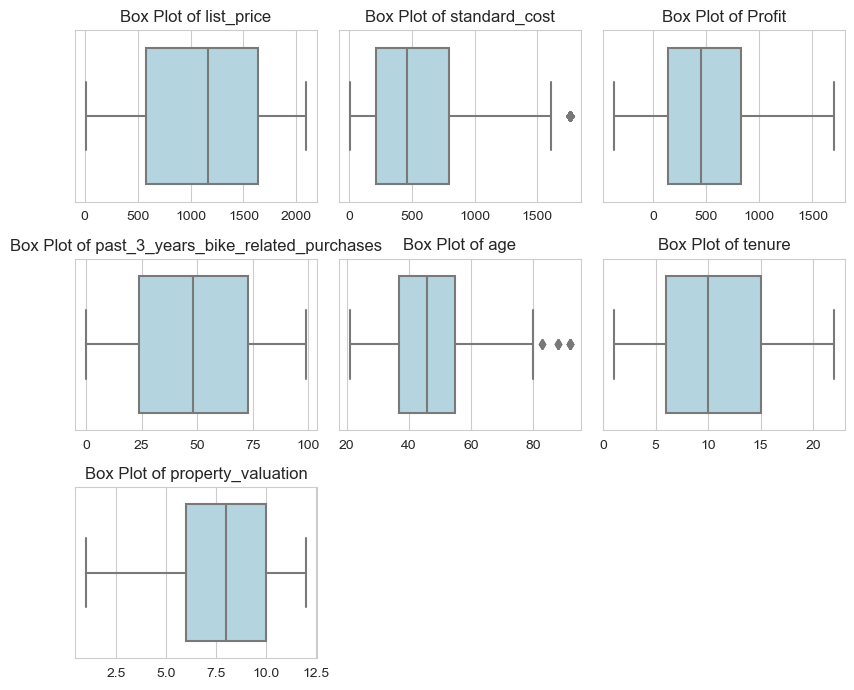

In [458]:
# distribution numerical data
# Create a box plot for each numerical column
plt.figure(figsize=(8, 7))
for i, col in enumerate(nums_t):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=Combined_data[col], color='lightblue')  
    plt.title(f'Box Plot of {col}')
    plt.xlabel('')
    plt.ylabel('')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



# Observations:
- List Price: No noticeable skew as the median is centered and there are no outliers.
- Standard Cost: Exhibits a slight right skew due to a high outlier, suggesting that most costs are concentrated towards higher values, although the majority of data appears symmetrically distributed around the median.
- Profit: Distribution is symmetric with the median centered and no outliers.
- Past 3 Years Bike-Related Purchases: Symmetric distribution with the median centered, indicative of consistent purchasing behavior with no outliers.
- Age: Shows right skewness with outliers on the higher end, suggesting that there are individuals significantly older than the median age.
- Tenure: Distribution is symmetric with a median around 10 and no outliers, indicating uniformity in tenure length.
- Property Valuation: Appears to be slightly left-skewed with the median closer to the third quartile, but without outliers.

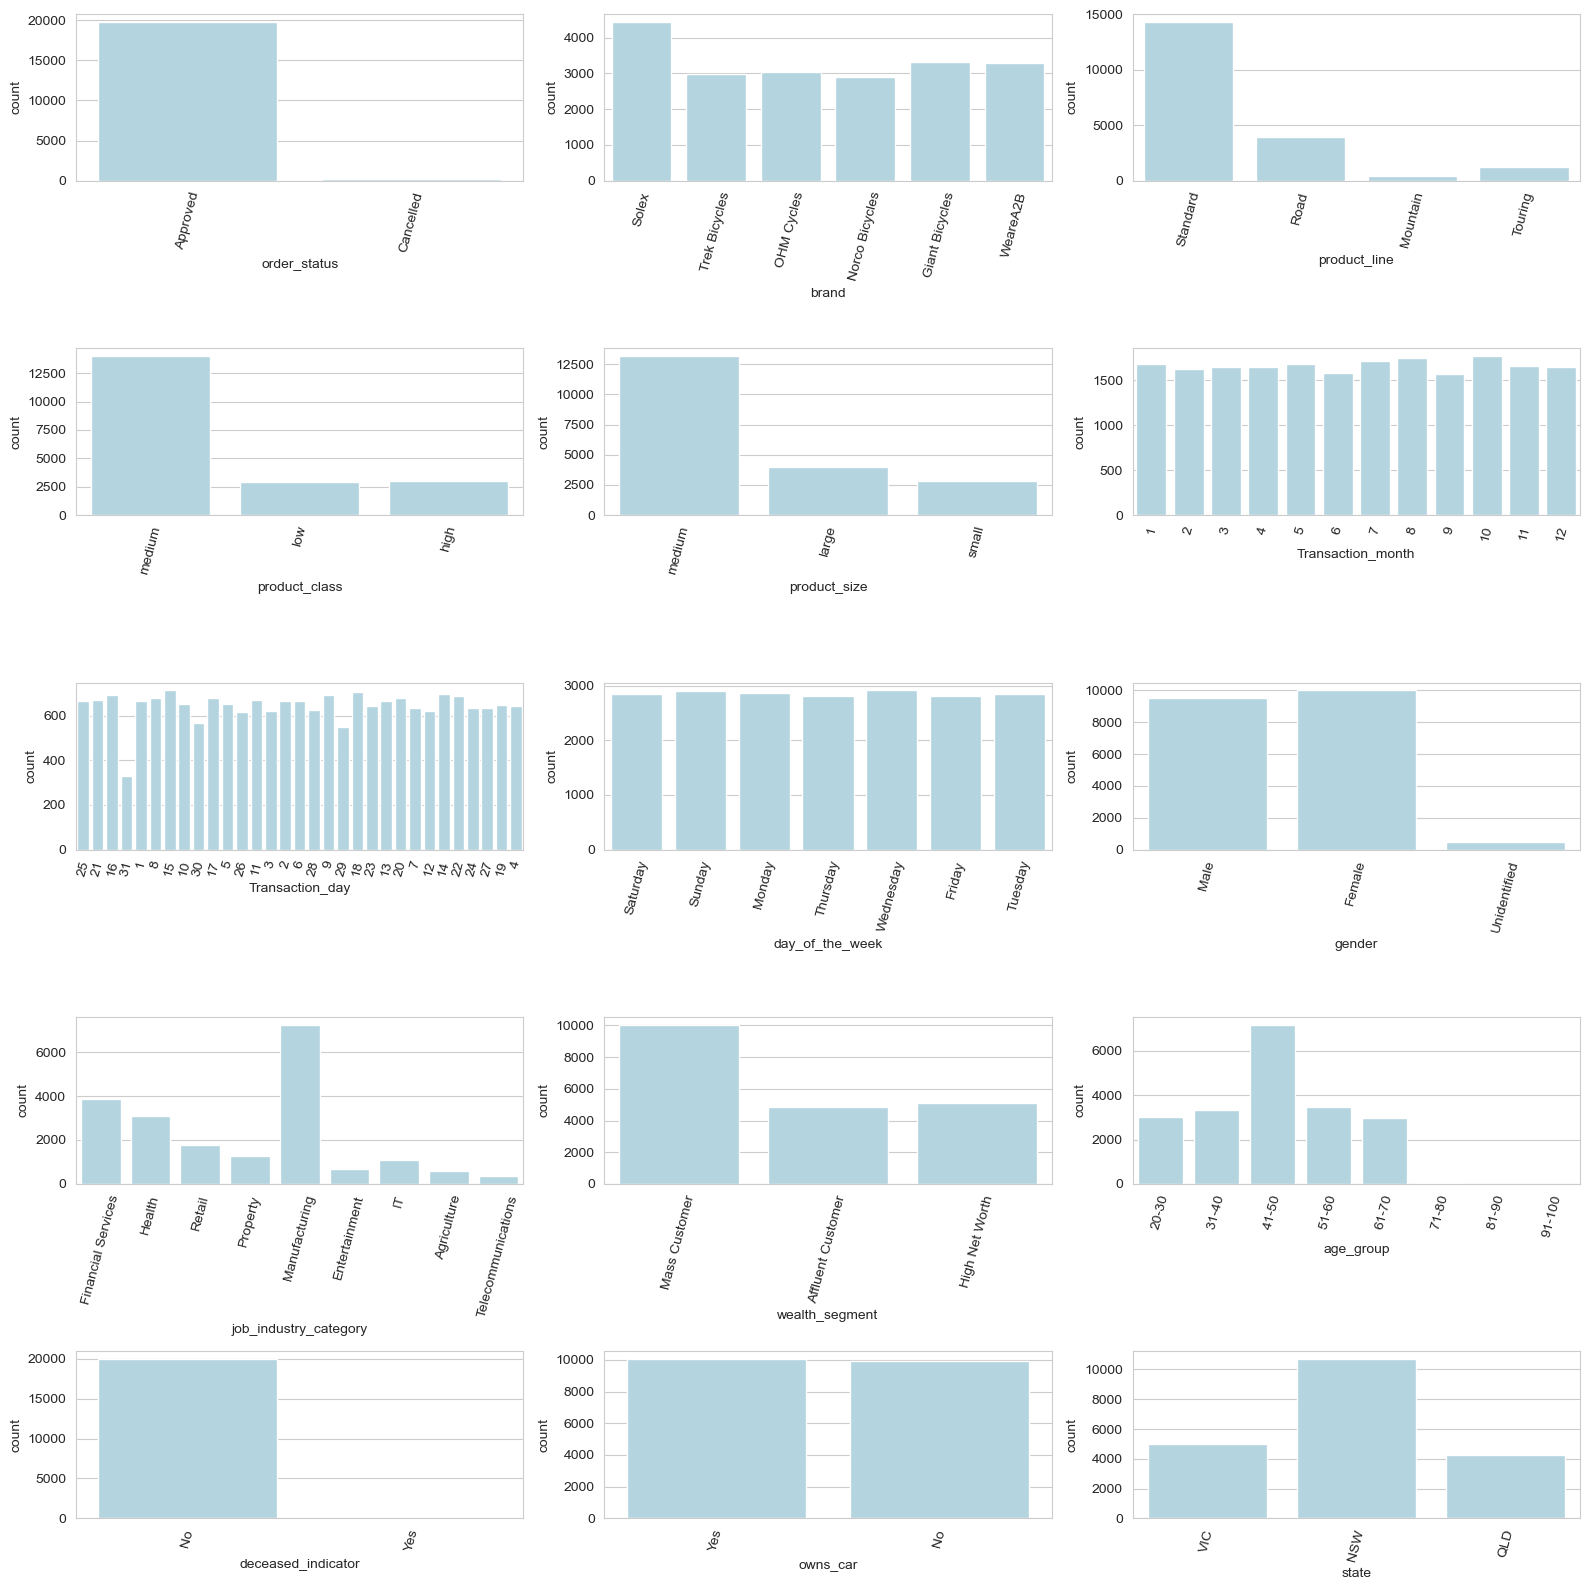

In [459]:
# List of categorical columns to plot
selected_cats = ['order_status','brand','product_line','product_class','product_size',  'Transaction_month', 
                 'Transaction_day','day_of_the_week','gender','job_industry_category',
                 'wealth_segment','age_group','deceased_indicator','owns_car',
                 'state']

# Calculate the number of rows and columns needed for the grid
num_cols = 3  # Number of columns 
num_rows = -(-len(selected_cats) // num_cols)  # Ceiling division to determine number of rows

# Create subplots for selected categorical columns
plt.figure(figsize=(16, 16))  # Adjust figsize for a larger grid
for i, cat in enumerate(selected_cats[:15]):  # Limit to 15 subplots
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(x=Combined_data[cat], color='lightblue', orient='v')  # Use 'orient' to make the bars vertical
    plt.xticks(rotation=75)  # Rotate x-axis tick labels by 75 degrees
    plt.tight_layout()

plt.show()



# Observations:



In [460]:
Combined_data.corr()

,online_order,list_price,standard_cost,Profit,Transaction_month,past_3_years_bike_related_purchases,age,tenure,property_valuation
online_order,1.000000,0.000708,0.008551,-0.006155,0.000297,0.004009,-0.001824,0.012047,-0.003481
list_price,0.000708,1.000000,0.548561,0.729986,-0.005072,0.006786,-0.002287,-0.005147,-0.009743
standard_cost,0.008551,0.548561,1.000000,-0.171009,-0.014859,-0.008285,0.001105,-0.013672,-0.000193
Profit,-0.006155,0.729986,-0.171009,1.000000,0.006169,0.014769,-0.003599,0.005111,-0.011323
Transaction_month,0.000297,-0.005072,-0.014859,0.006169,1.000000,-0.000120,-0.006032,-0.000308,-0.004719
past_3_years_bike_related_purchases,0.004009,0.006786,-0.008285,0.014769,-0.000120,1.000000,-0.040522,-0.020088,0.012140
age,-0.001824,-0.002287,0.001105,-0.003599,-0.006032,-0.040522,1.000000,0.443927,0.012645
tenure,0.012047,-0.005147,-0.013672,0.005111,-0.000308,-0.020088,0.443927,1.000000,-0.019179
property_valuation,-0.003481,-0.009743,-0.000193,-0.011323,-0.004719,0.012140,0.012645,-0.019179,1.000000


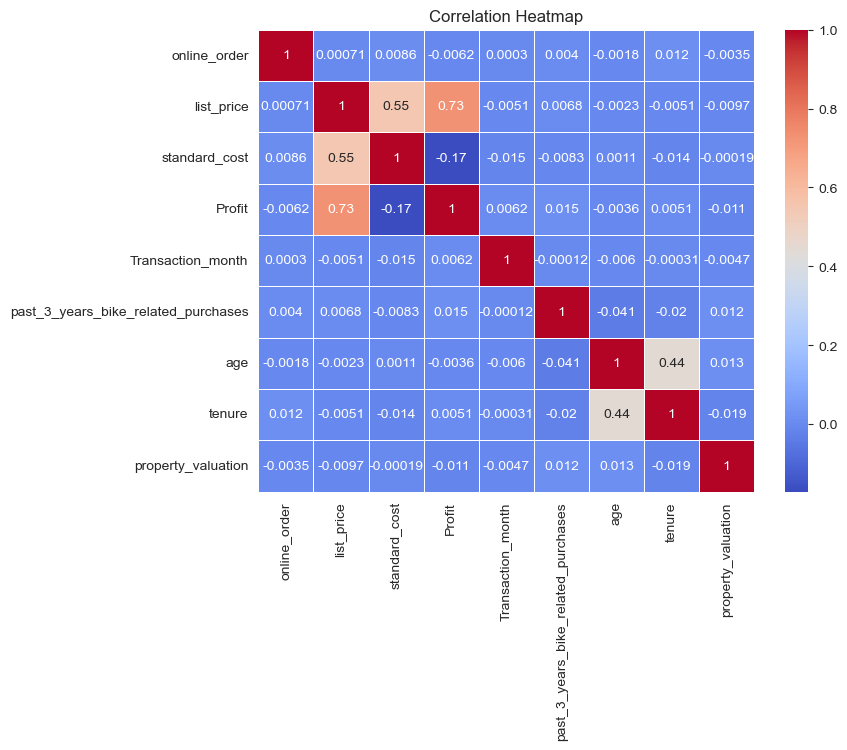

In [461]:
# Calculate the correlation matrix
correlation_matrix = Combined_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Observations:
- Profit is highly correlated with list price, and negatively correlated with standard cost.
- Tenure is positively correlated with age

# Total profits by age group and gender

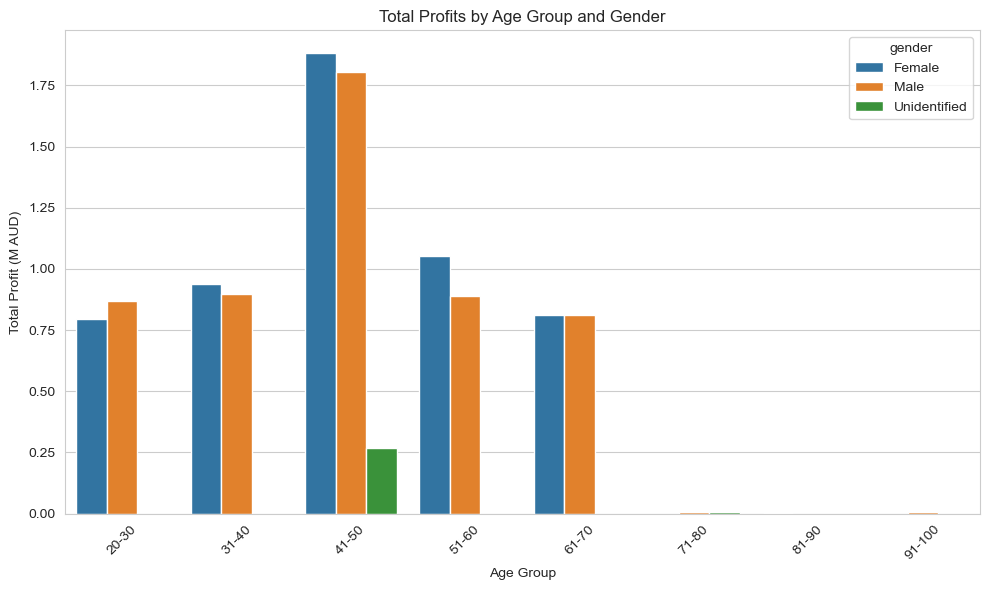

In [462]:
# Convert profit to millions of AUD
Combined_data['Profit_M_AUD'] = Combined_data['Profit'] / 1000000  # Converting profit to millions of AUD

# Calculate total profits by age group and gender
profits_by_age_gender = Combined_data.groupby(['age_group', 'gender'])['Profit_M_AUD'].sum().reset_index()

# Plot total profits by age group and gender
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='Profit_M_AUD', hue='gender', data=profits_by_age_gender)
plt.title('Total Profits by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Total Profit (M AUD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The age group of 41-50 accounted for the highest profit contribution.

# Total profits by wealth segment

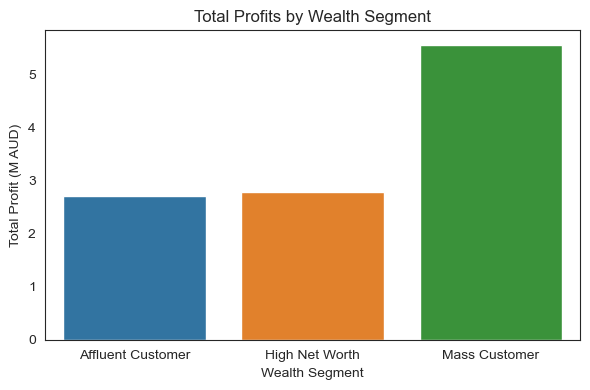

In [317]:
# Convert profit to millions of Australian dollars (AUD)
Combined_data['Profit_M_AUD'] = Combined_data['Profit'] / 1000000  # Converting profit to millions of Australian dollars (AUD)

# Calculate total profits by wealth segment
profits_by_wealth_segment = Combined_data.groupby('wealth_segment')['Profit_M_AUD'].sum().reset_index()

# Plot total profits by wealth segment
plt.figure(figsize=(6, 4))
sns.barplot(x='wealth_segment', y='Profit_M_AUD', data=profits_by_wealth_segment)
plt.title('Total Profits by Wealth Segment')
plt.xlabel('Wealth Segment')
plt.ylabel('Total Profit (M AUD)')
plt.tight_layout()


'Mass Customer' is the predominant segment over 'High Net Worth' and 'Affluent Customer'.

# Total profit percentage by product size

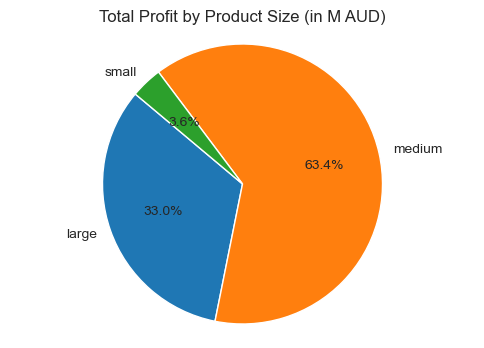

In [320]:
# Calculate total profit %  by product size
profit_by_product_size = Combined_data.groupby('product_size')['Profit_M_AUD'].sum().reset_index()

# Plot total profit by product size using a pie chart
plt.figure(figsize=(6, 4))
plt.pie(profit_by_product_size['Profit_M_AUD'], labels=profit_by_product_size['product_size'], autopct='%1.1f%%', startangle=140)
plt.title('Total Profit by Product Size (in M AUD)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The medium product size yields the highest profitability, followed by large and small sizes.

# Count of Past 3 Years Bike-related Purchases by Industry

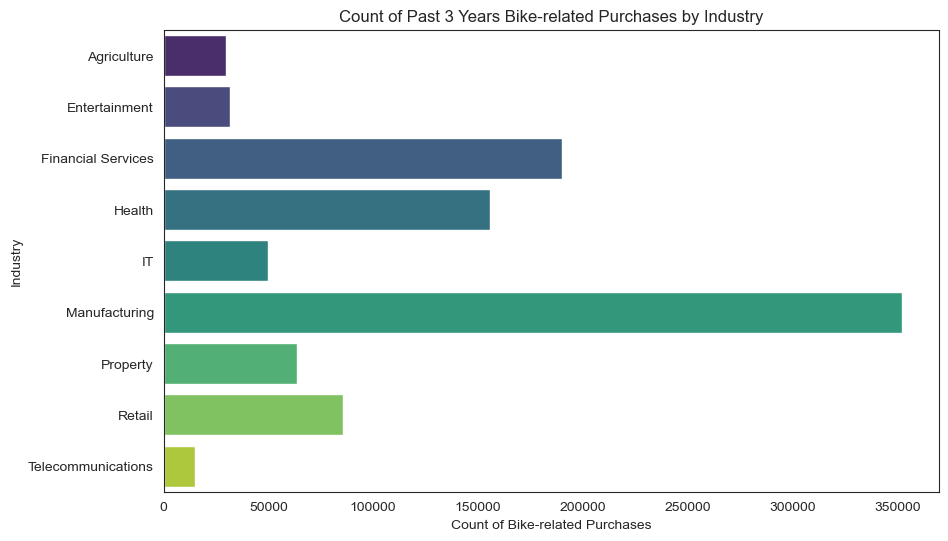

In [321]:
# Group by job industry category and sum bike-related purchases
industry_purchase_count = Combined_data.groupby('job_industry_category')['past_3_years_bike_related_purchases'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='past_3_years_bike_related_purchases', y='job_industry_category', data=industry_purchase_count, palette='viridis')
plt.title('Count of Past 3 Years Bike-related Purchases by Industry')
plt.xlabel('Count of Bike-related Purchases')
plt.ylabel('Industry')
plt.show()

In the past three years, the manufacturing industry has shown the highest representation in bike-related purchases, followed by financial services and health sectors.

# Number of Cars in Each State

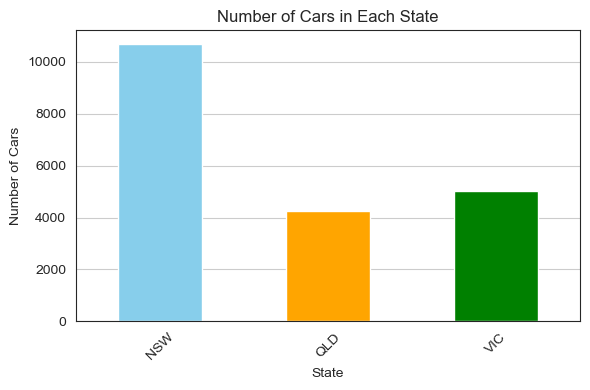

In [359]:
# Count the number of cars in each state
car_count_by_state = Combined_data.groupby('state')['owns_car'].value_counts().unstack(fill_value=0).sum(axis=1)

# Define colors for each state
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'pink']

# Plot
plt.figure(figsize=(6, 4))
car_count_by_state.plot(kind='bar', color=colors)
plt.title('Number of Cars in Each State')
plt.xlabel('State')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Customers residing in NSW possess the highest number of cars among the three states.

# Total Approved Orders by Brand

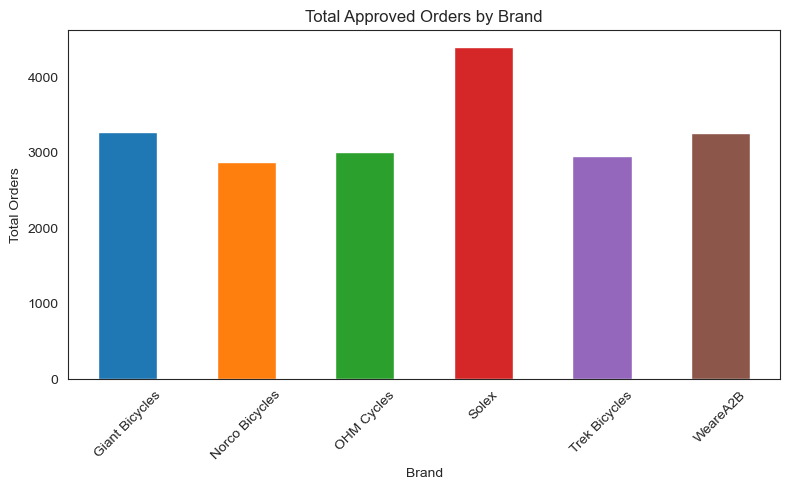

In [360]:
# Filter the dataset to include only approved orders
approved_orders = Combined_data[Combined_data['order_status'] == 'Approved']

# Calculate total orders by brand
total_orders_by_brand = approved_orders.groupby('brand')['transaction_id'].count()

# Plot
plt.figure(figsize=(8, 5))
total_orders_by_brand.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
plt.title('Total Approved Orders by Brand')
plt.xlabel('Brand')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In terms of total approved orders by brand, Solex has the highest count, indicating its popularity, followed by Giant Bicycle and WeareA2B.

# Total Profit and Count of Orders by Month

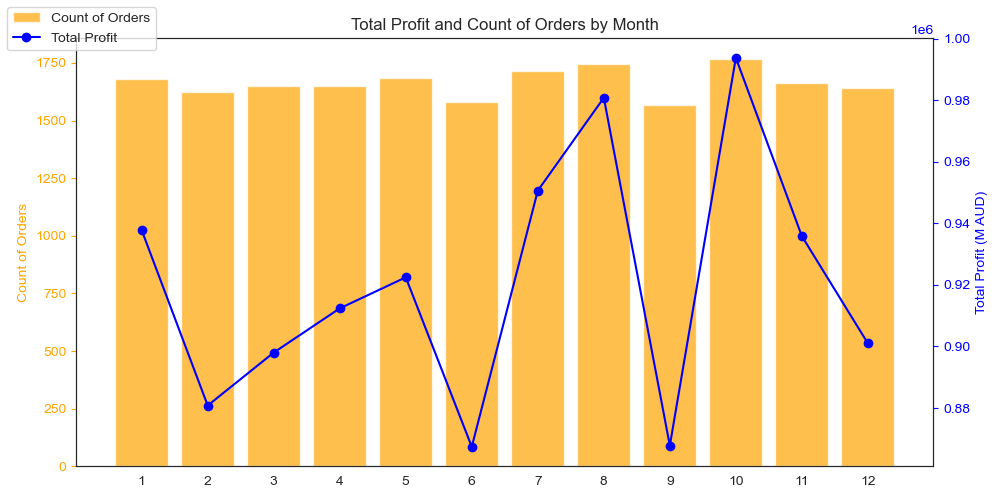

In [362]:
# Group the data by month
profit_orders_by_month = Combined_data.groupby('Transaction_month').agg({'Profit': 'sum', 'transaction_id': 'count'})

# Plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Create another y-axis for count of orders (bar chart)
ax1.bar(profit_orders_by_month.index, profit_orders_by_month['transaction_id'], color='orange', alpha=0.7, label='Count of Orders', zorder=1)  # Set zorder to push the bar chart behind the line plot
ax1.set_ylabel('Count of Orders', color='orange')
ax1.tick_params('y', colors='orange')

# Plot total profit (line chart)
ax2 = ax1.twinx()
ax2.plot(profit_orders_by_month.index, profit_orders_by_month['Profit'], marker='o', color='blue', label='Total Profit', zorder=2)  # Set zorder to bring the line plot to the front
ax2.set_xlabel('Month')
ax2.set_ylabel('Total Profit (M AUD)', color='blue')
ax2.tick_params('y', colors='blue')

# Rotate x-axis labels for better visibility
plt.xticks(profit_orders_by_month.index, rotation=45)

# Add title and legend
plt.title('Total Profit and Count of Orders by Month')
fig.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


The month of October had the highest amount of profit generated and the highest number of orders placed. Following October, the months of August and July had lesser profits and order counts in comparison.

In [363]:
Combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19968 entries, 0 to 19967
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19968 non-null  object        
 1   product_id                           19968 non-null  object        
 2   customer_id                          19968 non-null  object        
 3   transaction_date                     19968 non-null  datetime64[ns]
 4   online_order                         19968 non-null  bool          
 5   order_status                         19968 non-null  object        
 6   brand                                19968 non-null  object        
 7   product_line                         19968 non-null  object        
 8   product_class                        19968 non-null  object        
 9   product_size                         19968 non-null  object        
 10  list_price

# Orders by Wealth Segments and Gender

<Figure size 1000x600 with 0 Axes>

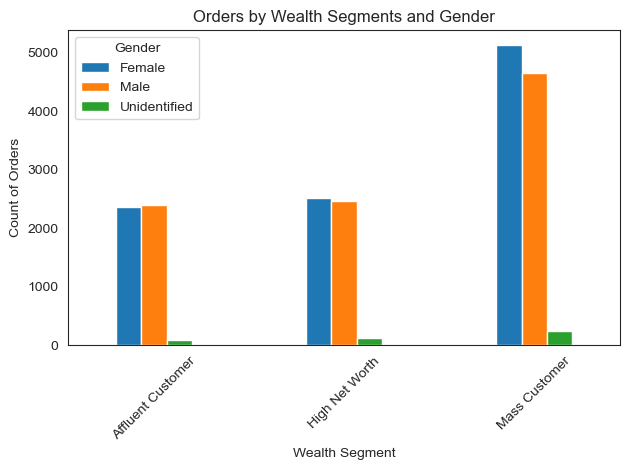

In [358]:
# Group the data by wealth segment and gender and count the orders
orders_by_wealth_gender = Combined_data.groupby(['wealth_segment', 'gender']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(10, 6))
orders_by_wealth_gender.plot(kind='bar', width=0.4)
plt.title('Orders by Wealth Segments and Gender')
plt.xlabel('Wealth Segment')
plt.ylabel('Count of Orders')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [466]:
Combined_data_updated = Combined_data.to_csv('Combined_data_updated.csv', index=False)

# Part 5: Cohort Analysis

## Understanding the retention rate for the medium size bikes & cycling accessories organisation.

To understand our medium-sized bikes and cycling accessories organization's retention rate, we'll use cohort analysis. It categorizes customers into cohorts based on their first purchase month, tracking them over time. Cohort analysis offers deeper insights than vanity metrics, helping us understand product and customer lifecycles.

There are three main cohort types:

- Time Cohorts: Customers signing up during specific periods.
- Behavior Cohorts: Previous purchasers or subscribers.
- Size Cohorts: Different-sized customer groups.
  
Our focus is on Time Cohorts, assigning a cohort index to each customer's transactions, indicating months since their first purchase. This approach reveals valuable retention insights.

## Assigned the cohorts and calculated the monthly offset

In [262]:
# Read the 'Transaction_df' sheet from the 'cleaned_data.xlsx' file
Cleaned_Transaction = pd.read_excel('cleaned_data.xlsx', sheet_name='Transaction_df')

# Display the first few rows of the DataFrame
Cleaned_Transaction.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit,Transaction_year,Transaction_month,Transaction_day,day_of_the_week
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04,17.87,2017,2,25,Saturday
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05,1702.55,2017,5,21,Sunday
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22,1544.61,2017,10,16,Monday
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18,817.36,2017,8,31,Thursday
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12,1055.82,2017,10,1,Sunday


In [263]:
Cleaned_Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  bool          
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [264]:
# Define a function to create TransactionMonth column based on year and month
def get_month(row):
    return pd.to_datetime(str(row['Transaction_year']) + '-' + str(row['Transaction_month']) + '-1')


In [265]:
# Apply the function to each row to create the TransactionMonth column
Cleaned_Transaction['TransactionMonth'] = Cleaned_Transaction.apply(get_month, axis=1)
Cleaned_Transaction['TransactionMonth'] 

0       2017-02-01
1       2017-05-01
2       2017-10-01
3       2017-08-01
4       2017-10-01
           ...    
19995   2017-06-01
19996   2017-11-01
19997   2017-04-01
19998   2017-07-01
19999   2017-09-01
Name: TransactionMonth, Length: 20000, dtype: datetime64[ns]

In [266]:
# Group by customer_id and select the minimum TransactionMonth value
Cleaned_Transaction.groupby('customer_id')['TransactionMonth'].min()
Cleaned_Transaction.groupby('customer_id')['TransactionMonth'].transform('min')


0       2017-02-01
1       2017-01-01
2       2017-01-01
3       2017-02-01
4       2017-01-01
           ...    
19995   2017-01-01
19996   2017-01-01
19997   2017-04-01
19998   2017-02-01
19999   2017-03-01
Name: TransactionMonth, Length: 20000, dtype: datetime64[ns]

In [267]:
# Grouping by customer_id and select the InvoiceMonth value
# Assigning a minimum InvoiceMonth value to the dataset
Cleaned_Transaction['CohortMonth'] = Cleaned_Transaction.groupby('customer_id')['TransactionMonth'].transform('min')
# printing top 5 rows
print(Cleaned_Transaction.head())

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25         False   
1               2           3         3120       2017-05-21          True   
2               3          37          402       2017-10-16         False   
3               4          88         3135       2017-08-31         False   
4               5          78          787       2017-10-01          True   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost product_first_sold_date   Profit  \
0       71.49          53.6

In [268]:

Cleaned_Transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit,Transaction_year,Transaction_month,Transaction_day,day_of_the_week,TransactionMonth,CohortMonth
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04,17.87,2017,2,25,Saturday,2017-02-01,2017-02-01
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05,1702.55,2017,5,21,Sunday,2017-05-01,2017-01-01
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22,1544.61,2017,10,16,Monday,2017-10-01,2017-01-01
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18,817.36,2017,8,31,Thursday,2017-08-01,2017-02-01
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12,1055.82,2017,10,1,Sunday,2017-10-01,2017-01-01


## Calculating time offset in Month as Cohort Index

Calculating the time offset for each transaction allows you to evaluate the metrics for each cohort in a comparable fashion.

First, we will create 6 variables that capture the integer value of years, months, and days for Transaction and Cohort Date using the get_date_int() function.

In [269]:
# Define a function to get the date integers from the existing columns
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

# Getting the integers for date parts from the `Transaction_year`, `Transaction_month`, and `Transaction_day` columns
transaction_year, transaction_month, transaction_day = get_date_int(Cleaned_Transaction, 'TransactionMonth')

# Getting the integers for date parts from the `Cohort_year`, `Cohort_month`, and `Cohort_day` columns (if needed)
cohort_year, cohort_month, cohort_day = get_date_int(Cleaned_Transaction,'CohortMonth')

Cleaned_Transaction.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit,Transaction_year,Transaction_month,Transaction_day,day_of_the_week,TransactionMonth,CohortMonth
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04,17.87,2017,2,25,Saturday,2017-02-01,2017-02-01
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05,1702.55,2017,5,21,Sunday,2017-05-01,2017-01-01
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22,1544.61,2017,10,16,Monday,2017-10-01,2017-01-01
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18,817.36,2017,8,31,Thursday,2017-08-01,2017-02-01
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12,1055.82,2017,10,1,Sunday,2017-10-01,2017-01-01


Now we will calculate the difference between the Invoice Dates and Cohort dates in years, months separately. then calculate the total Months difference between the two. This will be our month’s offset or cohort Index, which we will use in the next section to calculate the retention rate.

In [270]:
# Calculate the total number of months between Transaction and Cohort
months_diff = (transaction_year - cohort_year) * 12 + (transaction_month - cohort_month)

# Assign CohortIndex to Cleaned_Transaction
Cleaned_Transaction['CohortIndex'] = months_diff + 1


""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation.
 """
Cleaned_Transaction.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,standard_cost,product_first_sold_date,Profit,Transaction_year,Transaction_month,Transaction_day,day_of_the_week,TransactionMonth,CohortMonth,CohortIndex
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,53.62,2012-12-04,17.87,2017,2,25,Saturday,2017-02-01,2017-02-01,1
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,388.92,2014-03-05,1702.55,2017,5,21,Sunday,2017-05-01,2017-01-01,5
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,...,248.82,1999-07-22,1544.61,2017,10,16,Monday,2017-10-01,2017-01-01,10
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,381.10,1998-12-18,817.36,2017,8,31,Thursday,2017-08-01,2017-02-01,7
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,...,709.48,2015-08-12,1055.82,2017,10,1,Sunday,2017-10-01,2017-01-01,10


In [271]:
df_48 = Cleaned_Transaction[(Cleaned_Transaction['CohortMonth'] == '2017-07-01') & (Cleaned_Transaction['CohortIndex'] == 5)]

In [272]:
df_31 = Cleaned_Transaction[(Cleaned_Transaction['CohortMonth'] == '2017-07-01') & (Cleaned_Transaction['CohortIndex'] == 6)]

In [273]:
df_48.merge(df_31, how ='left', on = 'customer_id')

,transaction_id_x,product_id_x,customer_id,transaction_date_x,online_order_x,order_status_x,brand_x,product_line_x,product_class_x,product_size_x,...,standard_cost_y,product_first_sold_date_y,Profit_y,Transaction_year_y,Transaction_month_y,Transaction_day_y,day_of_the_week_y,TransactionMonth_y,CohortMonth_y,CohortIndex_y
0,1751,22,2730,2017-11-21,False,Approved,WeareA2B,Standard,medium,medium,...,297.43,2015-04-13,198.29,2017.0,12.0,9.0,Saturday,2017-12-01,2017-07-01,6.0
1,1751,22,2730,2017-11-21,False,Approved,WeareA2B,Standard,medium,medium,...,770.89,1994-08-12,456.45,2017.0,12.0,15.0,Friday,2017-12-01,2017-07-01,6.0
2,1751,22,2730,2017-11-21,False,Approved,WeareA2B,Standard,medium,medium,...,733.58,1993-07-22,327.98,2017.0,12.0,26.0,Tuesday,2017-12-01,2017-07-01,6.0
3,2161,98,2694,2017-11-22,False,Approved,Trek Bicycles,Standard,high,medium,...,205.36,2015-08-04,547.28,2017.0,12.0,1.0,Friday,2017-12-01,2017-07-01,6.0
4,2562,35,2514,2017-11-14,True,Approved,Giant Bicycles,Standard,medium,medium,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
5,3036,27,2730,2017-11-21,False,Approved,Trek Bicycles,Standard,medium,medium,...,297.43,2015-04-13,198.29,2017.0,12.0,9.0,Saturday,2017-12-01,2017-07-01,6.0
6,3036,27,2730,2017-11-21,False,Approved,Trek Bicycles,Standard,medium,medium,...,770.89,1994-08-12,456.45,2017.0,12.0,15.0,Friday,2017-12-01,2017-07-01,6.0
7,3036,27,2730,2017-11-21,False,Approved,Trek Bicycles,Standard,medium,medium,...,733.58,1993-07-22,327.98,2017.0,12.0,26.0,Tuesday,2017-12-01,2017-07-01,6.0
8,3398,51,1809,2017-11-20,False,Approved,OHM Cycles,Standard,high,medium,...,677.48,2014-03-05,451.65,2017.0,12.0,3.0,Sunday,2017-12-01,2017-07-01,6.0
9,3992,1,3172,2017-11-05,False,Approved,Giant Bicycles,Standard,medium,medium,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN



Here, at first, we create a group() object with CohortMonth and CohortIndex and store it as a grouping.

Then, we call this object, select the customer_id column and calculate the average.

Then we store the results as cohort_data. Then, we reset the index before calling the pivot function to be able to access the columns now stored as indices.

Finally, we create a pivot table bypassing

 -  CohortMonth to the index parameter,
 - CohortIndex to the columns parameter,
 - customer_id to the values parameter.

In [274]:
# Counting active customer from each chort
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = Cleaned_Transaction.groupby(['CohortMonth', 'CohortIndex']).nunique()['customer_id'].reset_index()
# Printing top 5 rows of Dataframe
cohort_data.head()

,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1,1354
1,2017-01-01,2,486
2,2017-01-01,3,508
3,2017-01-01,4,509
4,2017-01-01,5,502


# Calculate business metrics: Retention rate , total customer, Average standard cost, Average Orders amount, Total Profit

The percentage of active customers compared to the total number of customers after a specific time interval is called retention rate.

In this section, we will calculate the retention count for each cohort Month paired with cohort Index

Now that we have a count of the retained customers for each cohortMonth and cohortIndex. We will calculate the retention rate for each Cohort.

We will create a pivot table for this purpose.

# Total Customers : Monthly Cohort

In [275]:
cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1354.0,486.0,508.0,509.0,502.0,483.0,518.0,529.0,500.0,531.0,497.0,516.0
2017-02-01,800.0,325.0,298.0,313.0,288.0,298.0,308.0,281.0,329.0,308.0,296.0,NaN
2017-03-01,484.0,167.0,174.0,167.0,182.0,184.0,172.0,212.0,189.0,181.0,NaN,NaN
2017-04-01,336.0,111.0,121.0,153.0,143.0,121.0,142.0,126.0,132.0,NaN,NaN,NaN
2017-05-01,210.0,85.0,81.0,87.0,71.0,74.0,73.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,122.0,45.0,44.0,47.0,46.0,46.0,53.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,77.0,26.0,29.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,19.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


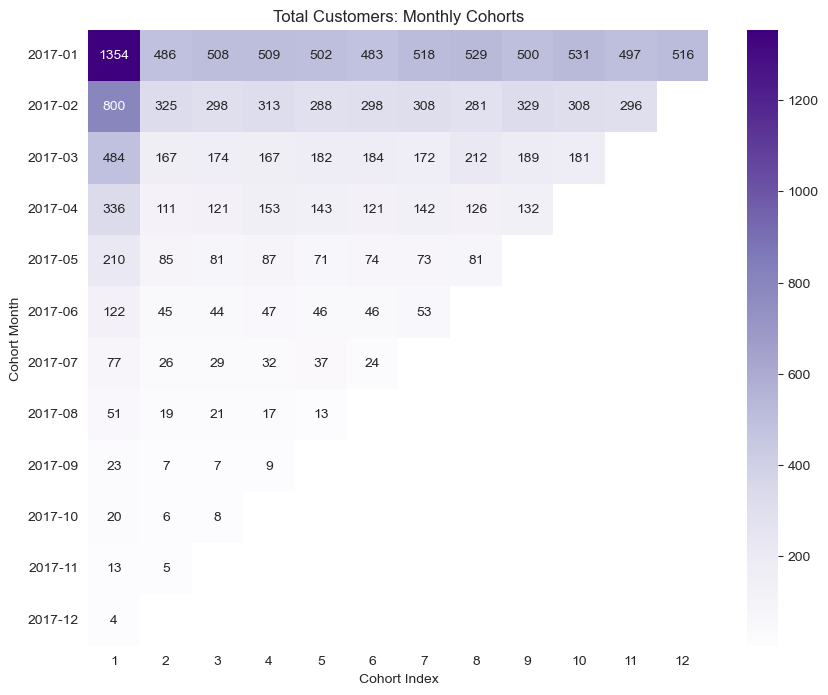

In [276]:
sns.set_style("white")
pivot_cohort_data = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='customer_id')

pivot_cohort_data.index = pivot_cohort_data.index.strftime('%Y-%m')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_cohort_data, annot=True,cmap='Purples', fmt='g') 
plt.title('Total Customers: Monthly Cohorts')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.yticks(rotation='horizontal')
plt.show()


# Analysis:
- Declining Active Customers: The gradual decline in active customers over time is a natural lifecycle pattern, emphasizing the importance of ongoing customer acquisition and retention efforts.
- Cohort Comparisons: Early cohorts like January 2017 maintaining a larger customer base over time could suggest that initial acquisition strategies were particularly effective or that early retention efforts (such as onboarding experiences) were more impactful. This could imply that learning from these early strategies and adapting them to current contexts may help in improving the retention of later cohorts.


# Retention rate : Cohort Analysis
Before we starting plotting our heatmap, let’s set the index of our Retention rate dataframe to a more readable string format.

In [277]:
cohort_counts = cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,35.9,37.5,37.6,37.1,35.7,38.3,39.1,36.9,39.2,36.7,38.1
2017-02-01,100.0,40.6,37.2,39.1,36.0,37.2,38.5,35.1,41.1,38.5,37.0,NaN
2017-03-01,100.0,34.5,36.0,34.5,37.6,38.0,35.5,43.8,39.0,37.4,NaN,NaN
2017-04-01,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05-01,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06-01,100.0,36.9,36.1,38.5,37.7,37.7,43.4,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The retention rate dataframe represents Customer retained across Cohorts. We can read it as follows:

Index value represents the Cohort
Columns represent the number of months since the current Cohort
For instance: The value at CohortMonth 2017-01-01, CohortIndex 3 is 35.9 and represents 35.9% of customers from cohort 2017-01 were retained in the 3rd Month.
Also, you can see from the retention Rate DataFrame:

- Retention Rate 1st index i.e 1st month is 100% as all the customers for that particular customer signed up in 1st Month
- The retention rate may increase or decrease in subsequent Indexes.
- Values towards the bottom right have a lot of NaN values.

In [278]:
retention.index = retention.index.strftime('%Y-%m')
retention.index

Index(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='object', name='CohortMonth')

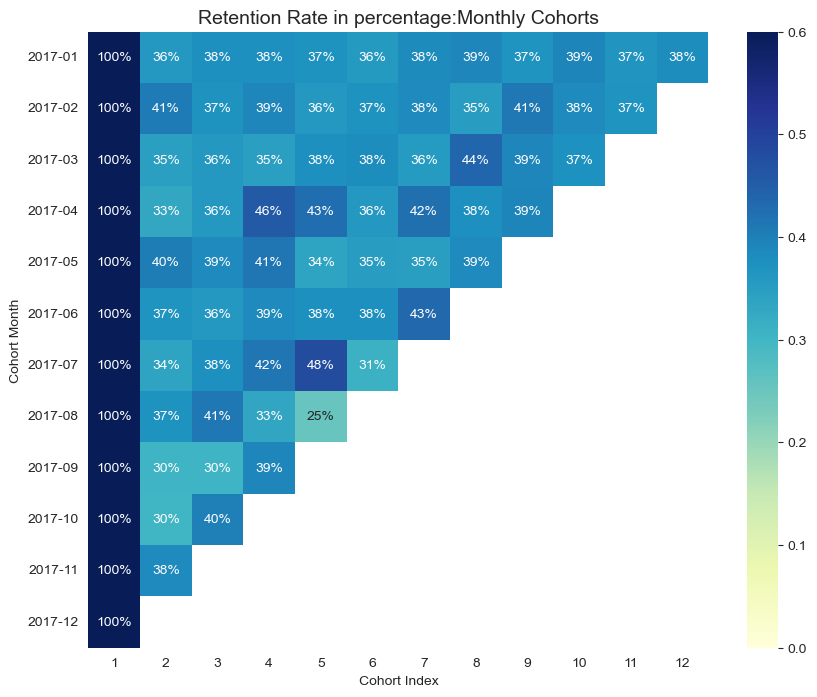

In [279]:
# Initialize the figure
plt.figure(figsize=(10, 8))

# Adding a title
plt.title('Retention Rate in percentage:Monthly Cohorts', fontsize = 14)

# Creating the seaborn based heatmap
sns.heatmap(retention, annot=True, fmt= '.0%',cmap='YlGnBu', vmin = 0.0 , vmax = 0.6)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks(rotation='horizontal')
plt.show()

# Analysis:
- Here, We have 12 cohorts for each month and 12 cohort indexes. The darker the blue shades higher the values. 
- The retention rate starts at 100% for all cohorts in the first month, which is expected as this is when the customers are newly acquired.
There is a sharp drop-off after the first month, which stabilizes somewhat in the following months. This indicates that while many users try out the service or product, a smaller, more consistent group continues to use it over time.
- Interestingly, some cohorts (e.g., July 2017) show a mid-term increase in retention (48% in the 5th month), suggesting that something during that period (like a marketing campaign or a seasonal effect) re-engaged users effectively.
- The August 2017 cohort shows a sharp decline in retention after the 4th month, dropping to 25% by the 5th month.

As per our objective, we will see 'average standard cost montly cohort' and 'average profit monthly cohort' and 'Average Frequency of Purchase per Customer Monthly Cohorts'.


# Average standard cost monthly cohort

In [280]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = Cleaned_Transaction.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the standard  average cost of the standard_cost column
cohort_data = grouping['standard_cost'].mean()

# Reset the index of cohort_data before pivot
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_standard_cost = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='standard_cost')

avg_standard_cost = average_standard_cost.round(1)


In [281]:
average_standard_cost.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,551.262640,575.780555,573.220126,576.957231,564.259707,579.647276,559.697825,510.908194,565.906387,529.367388,518.919643,547.625974
2017-02-01,558.956208,558.773227,545.033359,571.236591,545.021343,526.424570,581.540769,532.389429,570.240268,560.566425,569.444772,NaN
2017-03-01,532.194635,609.305581,622.262252,549.827097,521.416930,582.140181,563.378789,577.220560,530.018650,509.769021,NaN,NaN
2017-04-01,524.323373,619.136475,556.973841,551.397538,511.933229,515.410000,559.387299,508.745808,557.312515,NaN,NaN,NaN
2017-05-01,602.177645,557.432018,584.089223,574.582736,615.410244,495.097391,593.255109,599.257670,NaN,NaN,NaN,NaN


In [282]:
average_standard_cost.index = average_standard_cost.index.strftime('%Y-%m')
average_standard_cost.index

Index(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='object', name='CohortMonth')

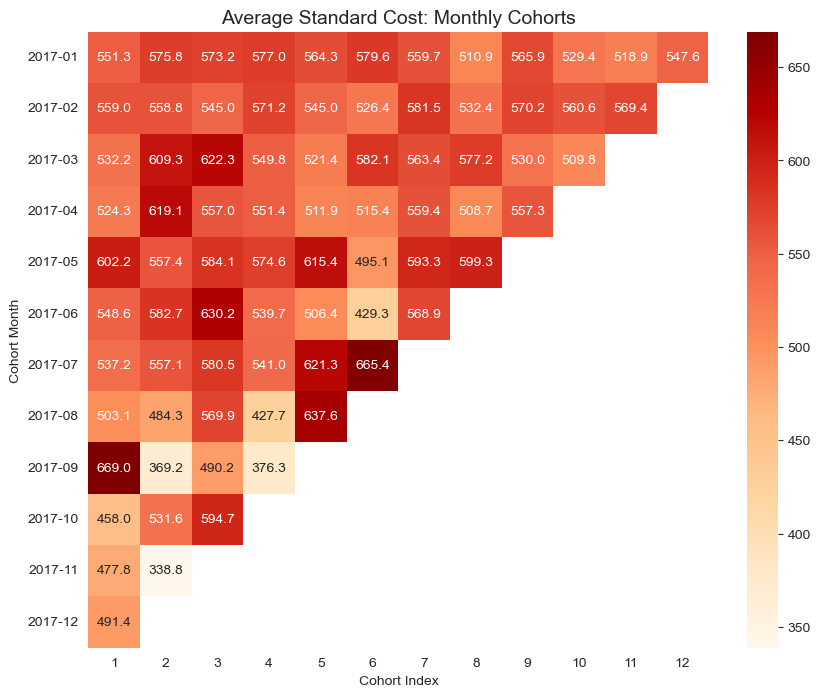

In [283]:
# Initialize the figure
plt.figure(figsize=(10,8))

# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize=14)

# Creating the heatmap
sns.heatmap(average_standard_cost, annot=True, cmap="OrRd", fmt='.1f')  
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks(rotation='horizontal')
plt.show()


# Analysis:
- The costs associated with each cohort fluctuate month-to-month without a clear upward or downward trend.
- **Initial Cost Variability**: The initial cost (Month 1) varies significantly between cohorts. For example, February 2017 started at a lower cost (532.2 units) compared to September 2017, which had a much higher initial cost (669.0 units). This could indicate changes in the cost structure, pricing strategies, or differences in the types of customers acquired in each cohort.
- **Mid-Cycle Cost Spikes** : There is noticeable variability within cohorts over time; for instance, the July 2017 cohort has a cost spike in the 6th month (665.4 units),  which could be due to a variety of factors such as:
1. Seasonal campaigns or promotions that led to higher costs due to increased marketing spend or discounts.
2. Changes in customer buying patterns, possibly due to the introduction of new products or services that initially cost more.
3. Operational changes that temporarily increased costs, such as expanding into new markets or investing in customer acquisition.

# Average Profit : Monthly Cohort

In [284]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = Cleaned_Transaction.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the profit column
cohort_data = grouping['Profit'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_profit = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Profit')

average_profit.round(1)


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,558.2,565.2,546.5,543.3,553.1,545.6,584.0,555.9,538.2,572.5,567.6,508.3
2017-02-01,529.2,544.4,570.3,556.6,581.7,564.2,568.5,531.8,520.3,554.8,528.7,NaN
2017-03-01,539.0,560.5,532.8,516.5,524.7,575.7,573.5,562.0,593.4,586.0,NaN,NaN
2017-04-01,549.2,540.3,545.4,530.5,525.3,583.8,550.6,576.4,678.3,NaN,NaN,NaN
2017-05-01,542.7,521.9,525.4,569.7,550.9,643.7,477.0,621.7,NaN,NaN,NaN,NaN
2017-06-01,557.6,572.7,576.5,663.9,563.6,645.2,540.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,463.2,574.6,586.9,567.7,489.9,497.3,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,587.6,460.6,788.2,624.4,530.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,649.1,550.6,225.9,553.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [285]:
# Formatting the index
average_profit.index = average_profit.index.strftime('%Y-%m')

# Adding a name to the columns
average_profit.columns.name = 'Cohort Index'

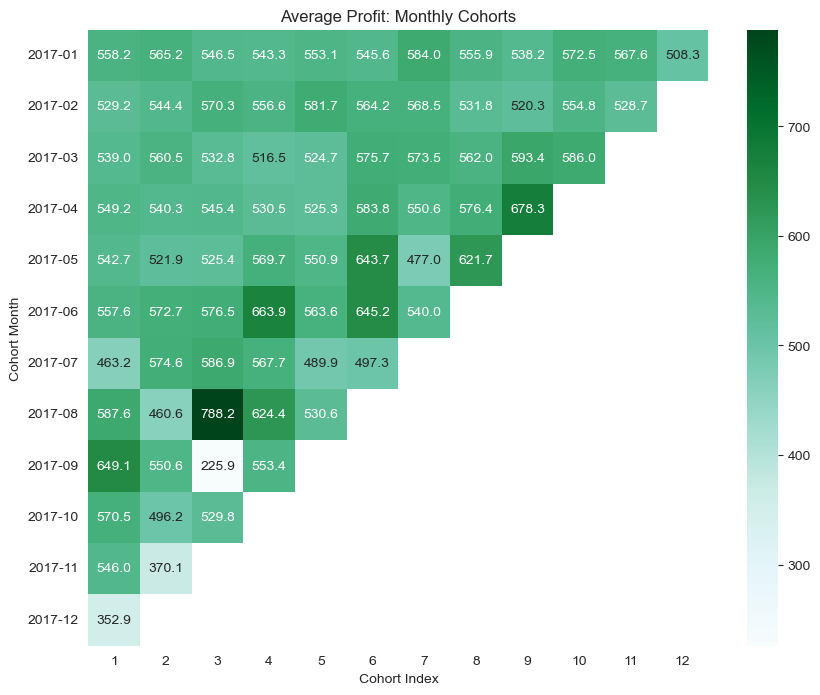

In [286]:
plt.figure(figsize=(10, 8))
sns.heatmap(average_profit, annot=True, cmap='BuGn', fmt='.1f')  # Adjusted fmt to display one decimal place
plt.title('Average Profit: Monthly Cohorts')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.yticks(rotation='horizontal')
plt.show()

# Analysis:
- **Profit Variability**: The fluctuating average profit across cohorts, without a clear trend, suggests that multiple factors influence profitability over time. This could include changes in the cost of customer acquisition, variations in the average order value, or differences in operational efficiency.
- **Profit Spikes**: Significant profit increases, such as the observed spike in August 2017(e.g., a jump to 788.2 units in the 3th month), warrant a closer look to understand their drivers. This could involve analyzing the specific actions taken during those periods, such as pricing adjustments, promotional campaigns, or product launches. Understanding the context around these spikes can help replicate successful conditions and strategies in other cohorts or periods.
- The September 2017 cohort displays a significant drop in the 3rd month, with average profit falling to 225.9.

# Average Frequency of Purchase per Customer: Monthly Cohorts

In [287]:
# Calculate the number of transactions made by each customer within each cohort group
cohort_data = Cleaned_Transaction.groupby(['CohortMonth', 'CohortIndex', 'customer_id']).size().reset_index(name='Frequency')

# Calculate the average frequency of purchase per customer within each cohort
cohort_data = cohort_data.groupby(['CohortMonth', 'CohortIndex'])['Frequency'].mean().reset_index()

# Create a pivot table
frequency_pivot = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Frequency')

# Format the index
frequency_pivot.index = frequency_pivot.index.strftime('%Y-%m')


# Adding a name to the columns
frequency_pivot.columns.name = 'Cohort Index'


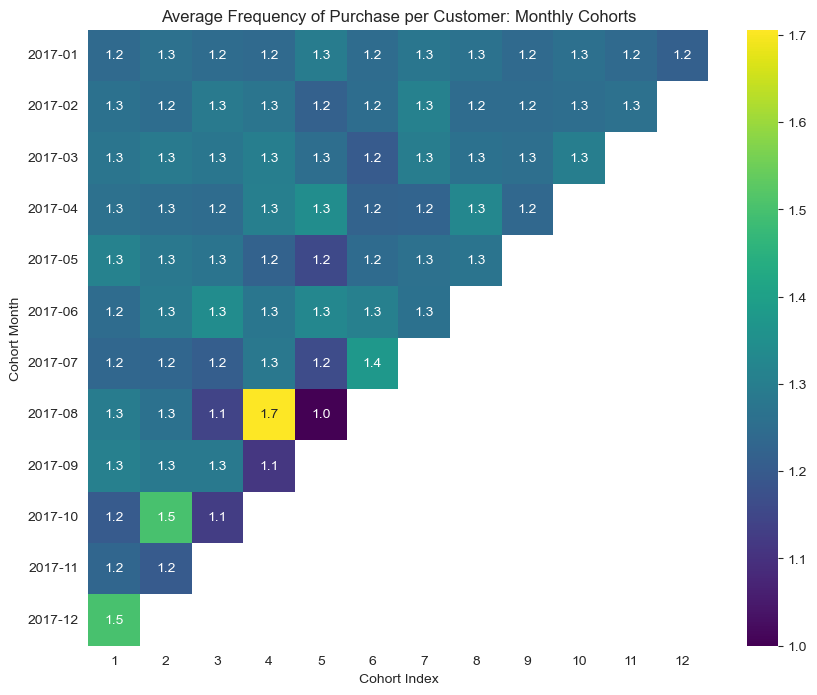

In [289]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(frequency_pivot, annot=True, cmap='viridis', fmt='.1f')
plt.title('Average Frequency of Purchase per Customer: Monthly Cohorts')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.yticks(rotation='horizontal')
plt.show()


# Analysis:
- Purchase frequency is relatively stable across cohorts, hovering around 1.2 to 1.3 purchases per month, which suggests customers have a consistent buying pattern.
- Notable Deviations: The August 2017 cohort's significant increase in purchase frequency to 1.7 in the 4th month could be due to several reasons:
1. A successful marketing campaign or sales promotion that resonated with customers, prompting them to make more purchases than usual.
Introduction of new products or services that attracted additional purchases from existing customers.
2. Seasonal factors that typically increase purchase frequency, such as holidays or events.
3. Cohort-Specific Patterns: Some cohorts have unique patterns that deviate from the average. For instance, the July 2017 cohort shows an increase in purchase frequency in the 6th month, indicating that something specific to that cohort or time period encouraged repeat purchases.


# Retention Rate and Average Profit:
Analyzing the heat maps for retention rate and average profit, the cohort from August 2017 stands out as the most valuable with a retention rate of 41% and an average profit of 788.2. In stark contrast, the September 2017 cohort is the least valuable, experiencing a significant drop by the third month, with profits falling to 225.9 and retention at 30%.

To capitalize on these insights, the strategy should involve:
- Leveraging Success: Understand what factors contributed to August 2017's success and apply these learnings to improve other cohorts.
- Addressing Decline: Investigate the reasons behind September 2017's drop to develop remedial actions.
- Enhancing Engagement: Implement personalized engagement and retention initiatives based on customer feedback and behavior analysis.

# Insights
1. **Correlation with Other Metrics**: To gain further insights, it would be beneficial to correlate cost data with other metrics such as customer lifetime value, revenue, or profit margins. This would help to understand whether cost increases are justified by corresponding increases in value.
2. **Potential for Optimization**: Identifying the reasons behind cost fluctuations could offer opportunities for cost optimization. For example, if cost spikes are linked to specific marketing campaigns, it might be worth evaluating their ROI or adjusting the approach to maintain cost-effectiveness.
3. **Strategic Insights from Purchase Spikes**: Any notable increases in the purchase frequency should be analyzed to understand the underlying business decisions or market conditions that drove them, providing insights for replicating this success in future strategies.
4. **Financial Performance Alignment**: Comparing the purchase frequency with retention rates and profit margins could reveal valuable correlations where higher frequency may lead to higher profitability, underscoring the effectiveness of customer retention strategies.
5. **Enhanced Revenue Opportunities**: The ongoing regularity of purchases presents potential opportunities for additional revenue through cross-selling and up-selling, particularly with cohorts that exhibit higher purchase frequencies, indicating their openness to exploring more products or services.
